<a href="https://colab.research.google.com/github/manola1109/Water-Quality-Prediction-Project-using-Deep-Learning-Neural-Networks/blob/main/Water_Quality_Prediction_Project_using_Deep_Learning_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# For preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, explained_variance_score, median_absolute_error
from sklearn.metrics import max_error as max_error_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [7]:
# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

In [8]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
# Load the dataset
# Replace 'water_quality_data.csv' with the actual file path
data = pd.read_csv('water_quality_data.csv')

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:")
display(data.head())

# Check for missing values
print("\nMissing values per column:")
display(data.isnull().sum())

# Display statistics
print("\nDataset Statistics:")
display(data.describe())

Dataset Shape: (19029, 24)

First 5 rows:


,Well_ID,State,District,Block,Village,Latitude,Longitude,Year,pH,EC,...,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI,Water Quality Classification
0,W232200071580001,Gujarat,Ahmedabad,Mandal,Dalod,NaN,NaN,2020,8.20,16640.0,...,26.00,1451.0,152.0,260.0,3535.0,45.0,1.00,11149,4361.44080,Unsuitable for Drinking
1,W254029084355301,Himachal Pradesh,Solan,Nallagarh,JAGATPUR,31.1594,76.678500,2019,8.44,299.0,...,2.70,84.0,17.0,10.0,39.0,2.4,0.20,262,85.80466,Good
2,W193530074180001,Maharashtra,Ahmednagar,SANGAMNER,Kokangaon,74.3000,19.591667,2022,7.90,1315.0,...,18.20,465.0,80.2,64.4,88.3,1.6,0.53,372,280.04130,Very Poor yet Drinkable
3,W231620072033001,Gujarat,Ahmedabad,Viramgam,Endla,NaN,NaN,2020,7.40,715.0,...,0.23,280.0,56.0,34.0,47.0,11.0,0.46,479,195.11649,Poor
4,W251908084361501,Himachal Pradesh,Solan,Nallagarh,BARUNA,31.1540,76.638400,2019,8.40,270.0,...,10.00,116.0,10.0,18.0,23.0,1.0,0.12,262,81.77860,Good



Missing values per column:


,0
Well_ID,3785
State,0
District,0
Block,1119
Village,1
Latitude,389
Longitude,390
Year,0
pH,0
EC,0



Dataset Statistics:


,Latitude,Longitude,Year,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI
count,1.864000e+04,1.863900e+04,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000
mean,1.509049e+02,4.021432e+03,2020.286195,7.713495,1191.620744,3.326689,296.774490,171.843482,68.087940,35.114294,327.843466,65.114035,40.505256,113.673866,13.465496,0.595598,723.774239,305.291789
std,1.529204e+04,5.401512e+05,1.314794,0.491413,1348.094278,15.496995,180.861685,349.922000,148.853626,55.488528,310.386082,62.018322,49.654295,200.551600,38.839328,1.818577,755.575601,315.477116
min,0.000000e+00,0.000000e+00,2019.000000,2.800000,2.290000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,-0.160000,15.000000,9.043604
25%,1.998330e+01,2.522500e+01,2019.000000,7.450000,524.000000,0.000000,177.000000,32.000000,13.000000,4.460000,165.000000,28.100000,15.000000,28.000000,1.700000,0.206000,345.000000,146.642420
50%,2.417842e+01,7.617500e+01,2020.000000,7.720000,860.000000,0.000000,281.000000,78.000000,30.790000,18.000000,260.000000,50.100000,29.000000,60.400000,3.630000,0.430000,587.000000,232.078880
75%,7.571110e+01,7.953710e+01,2022.000000,8.000000,1390.000000,0.000000,390.400000,175.000000,69.000000,43.000000,400.000000,80.000000,49.800000,121.000000,9.510000,0.770000,913.000000,359.718240
max,2.087833e+06,7.374400e+07,2022.000000,10.920000,26520.000000,368.000000,3112.000000,9217.000000,7601.000000,1534.900000,8606.880000,1840.000000,1483.500000,5489.000000,1353.000000,168.000000,17768.000000,6850.888720


Dataset information:
Number of samples: 19029
Number of features: 24

Data types:
Well_ID                          object
State                            object
District                         object
Block                            object
Village                          object
Latitude                        float64
Longitude                       float64
Year                              int64
pH                              float64
EC                              float64
CO3                             float64
HCO3                            float64
Cl                              float64
SO4                             float64
NO3                             float64
TH                              float64
Ca                              float64
Mg                              float64
Na                              float64
K                               float64
F                               float64
TDS                               int64
WQI                             float6

,count,mean,std,min,25%,50%,75%,max
Latitude,18640.0,150.904931,15292.040585,0.000000,19.98330,24.178415,75.71110,2.087833e+06
Longitude,18639.0,4021.431802,540151.202121,0.000000,25.22500,76.175000,79.53710,7.374400e+07
Year,19029.0,2020.286195,1.314794,2019.000000,2019.00000,2020.000000,2022.00000,2.022000e+03
pH,19029.0,7.713495,0.491413,2.800000,7.45000,7.720000,8.00000,1.092000e+01
EC,19029.0,1191.620744,1348.094278,2.290000,524.00000,860.000000,1390.00000,2.652000e+04
CO3,19029.0,3.326689,15.496995,0.000000,0.00000,0.000000,0.00000,3.680000e+02
HCO3,19029.0,296.774490,180.861685,0.000000,177.00000,281.000000,390.40000,3.112000e+03
Cl,19029.0,171.843482,349.922000,0.000000,32.00000,78.000000,175.00000,9.217000e+03
SO4,19029.0,68.087940,148.853626,0.000000,13.00000,30.790000,69.00000,7.601000e+03
NO3,19029.0,35.114294,55.488528,0.000000,4.46000,18.000000,43.00000,1.534900e+03



Sample distribution across states:


,count
State,
Madhya Pradesh,3628
Maharashtra,2366
Tamil Nadu,2115
Karnataka,1822
Gujarat,1657
Bihar,1349
West Bengal,1301
Andhra Pradesh,1265
Uttar Pradesh,1260



Year-wise distribution of samples:


,count
Year,
2019,8650
2020,2136
2021,2390
2022,5853



Water Quality Index (WQI) summary:
Mean WQI: 305.29
Median WQI: 232.08
Min WQI: 9.04
Max WQI: 6850.89
Standard Deviation: 315.48

Water Quality Classification distribution:


,count
Water Quality Classification,
Unsuitable for Drinking,6608
Poor,5317
Very Poor yet Drinkable,4709
Good,1632
Excellent,763


Number of unique classifications: 5

Missing values in each column:


,Missing Values,Percentage
Well_ID,3785,19.890693
Block,1119,5.880498
Longitude,390,2.049503
Latitude,389,2.044248
Village,1,0.005255


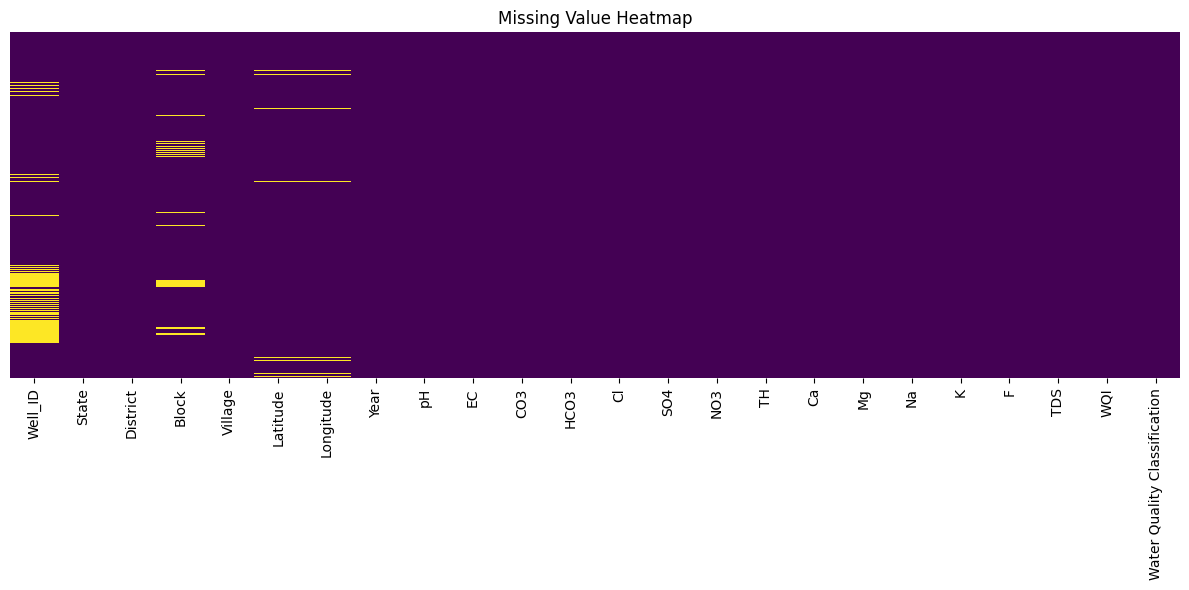

In [13]:
# First, let's examine the dataset in more detail
print("Dataset information:")
print(f"Number of samples: {data.shape[0]}")
print(f"Number of features: {data.shape[1]}")
print("\nData types:")
print(data.dtypes)

# Check for duplicates
duplicate_count = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Basic statistics for numeric columns
print("\nSummary statistics for numeric features:")
display(data.describe().transpose())

# Distribution of geographical samples
print("\nSample distribution across states:")
state_counts = data['State'].value_counts()
display(state_counts.head(10))  # Show top 10 states

# Year-wise distribution of samples
print("\nYear-wise distribution of samples:")
year_counts = data['Year'].value_counts().sort_index()
display(year_counts)

# Check target variable distributions
print("\nWater Quality Index (WQI) summary:")
print(f"Mean WQI: {data['WQI'].mean():.2f}")
print(f"Median WQI: {data['WQI'].median():.2f}")
print(f"Min WQI: {data['WQI'].min():.2f}")
print(f"Max WQI: {data['WQI'].max():.2f}")
print(f"Standard Deviation: {data['WQI'].std():.2f}")

print("\nWater Quality Classification distribution:")
wq_dist = data['Water Quality Classification'].value_counts()
display(wq_dist)
print(f"Number of unique classifications: {data['Water Quality Classification'].nunique()}")

# Check for missing values and visualize
print("\nMissing values in each column:")
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_percent = (data.isnull().sum() / len(data) * 100).sort_values(ascending=False)
missing_data = pd.concat([missing_values, missing_percent], axis=1, keys=['Missing Values', 'Percentage'])
display(missing_data[missing_data['Missing Values'] > 0])

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap')
plt.tight_layout()
plt.show()

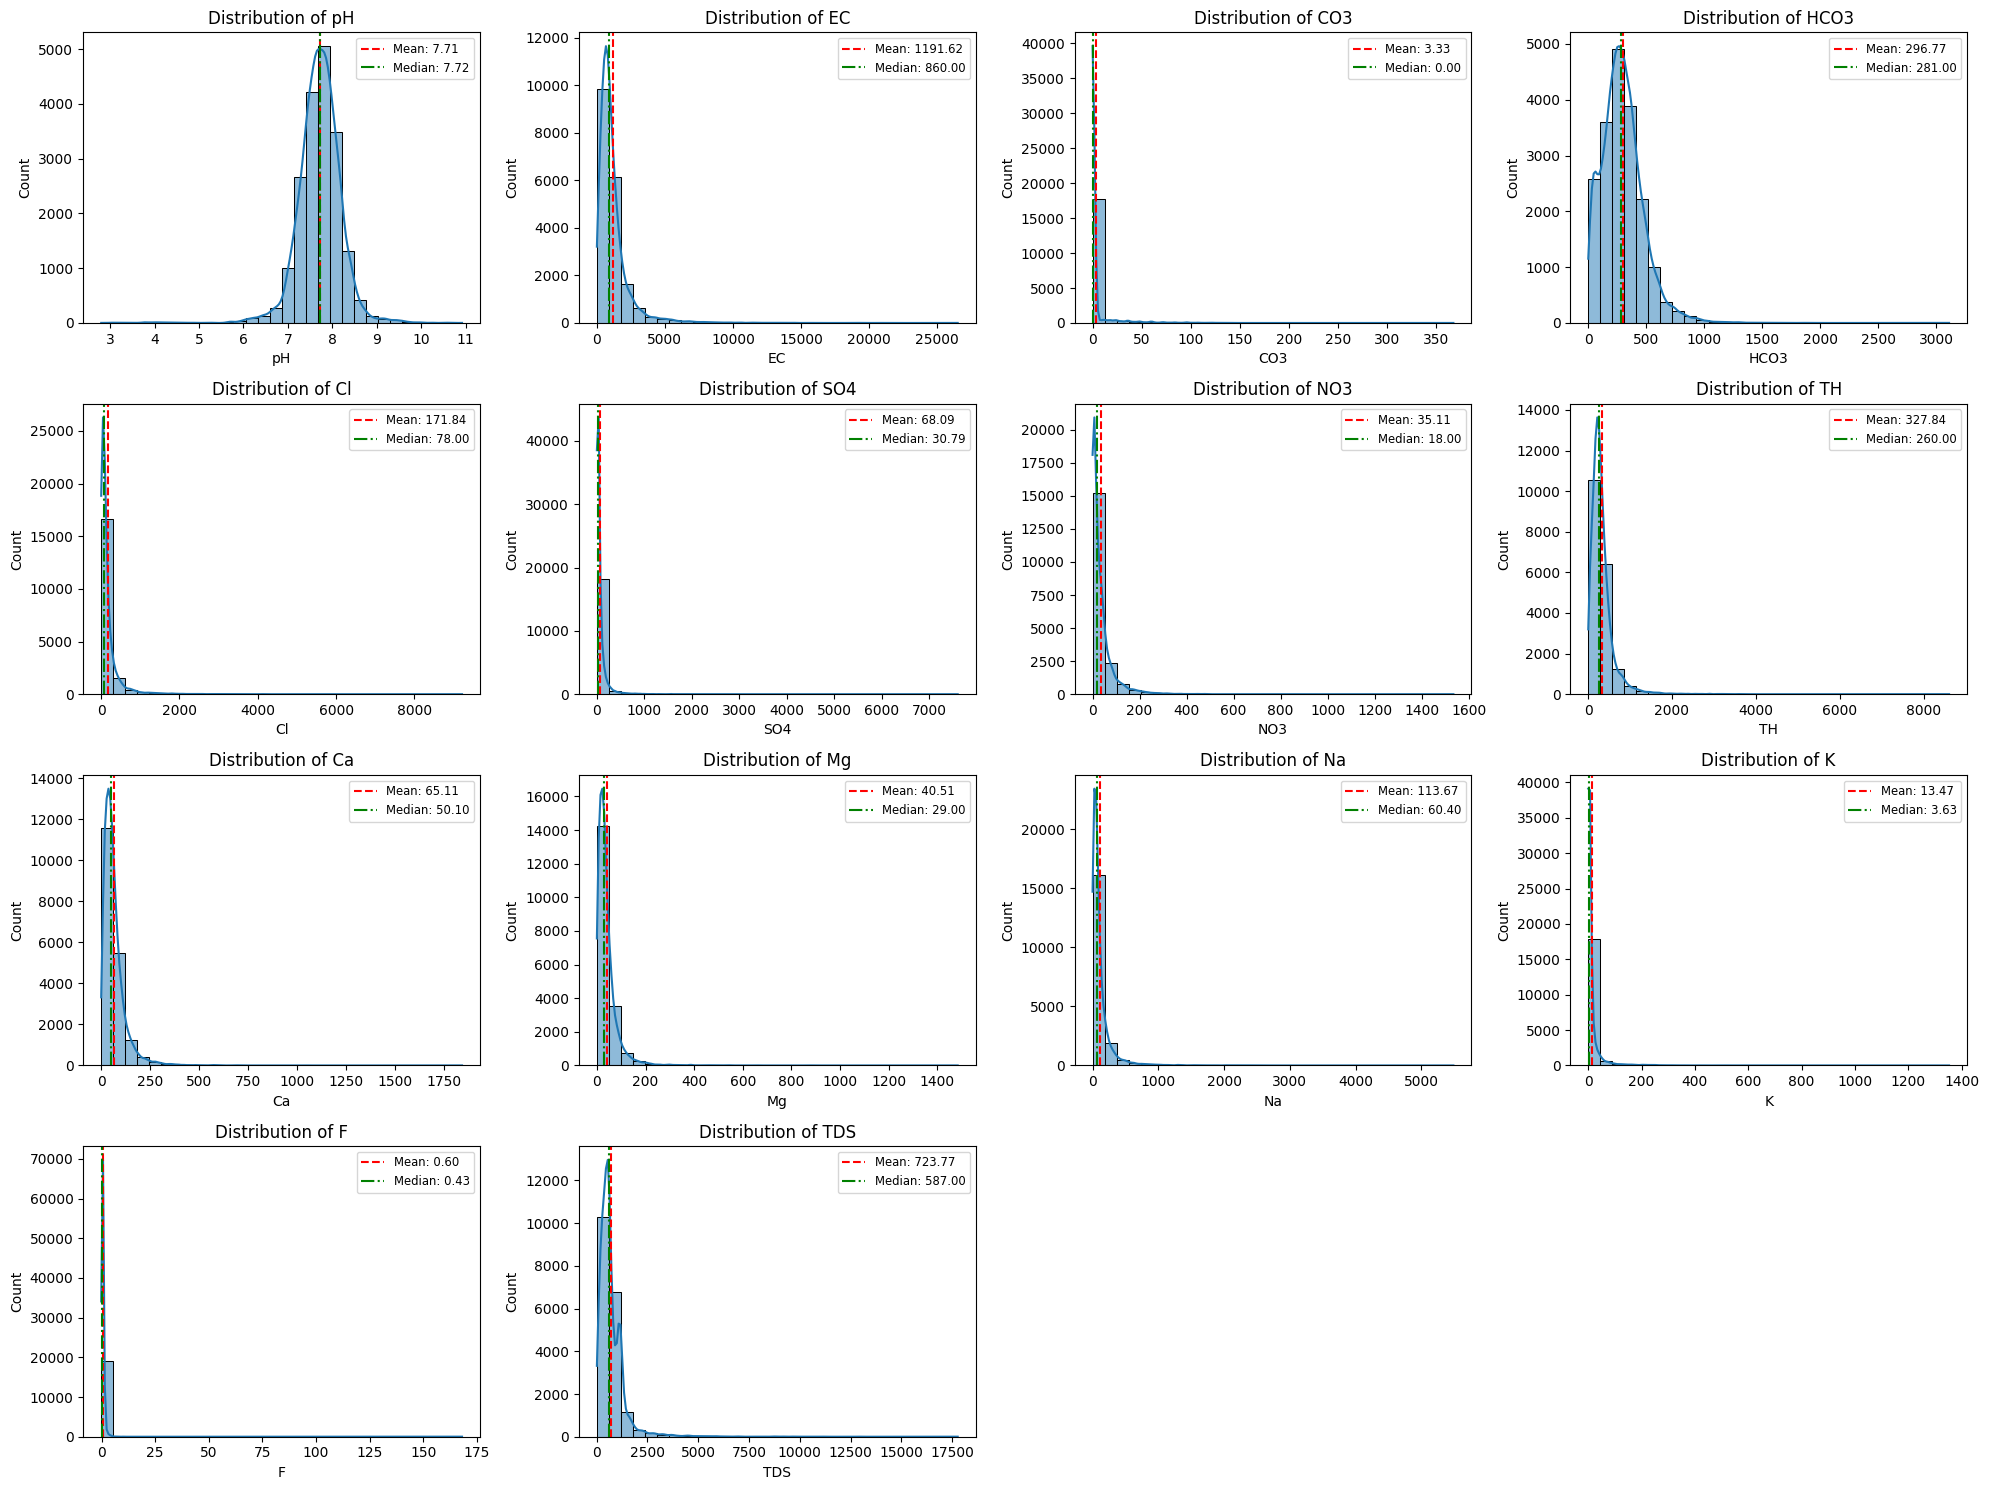

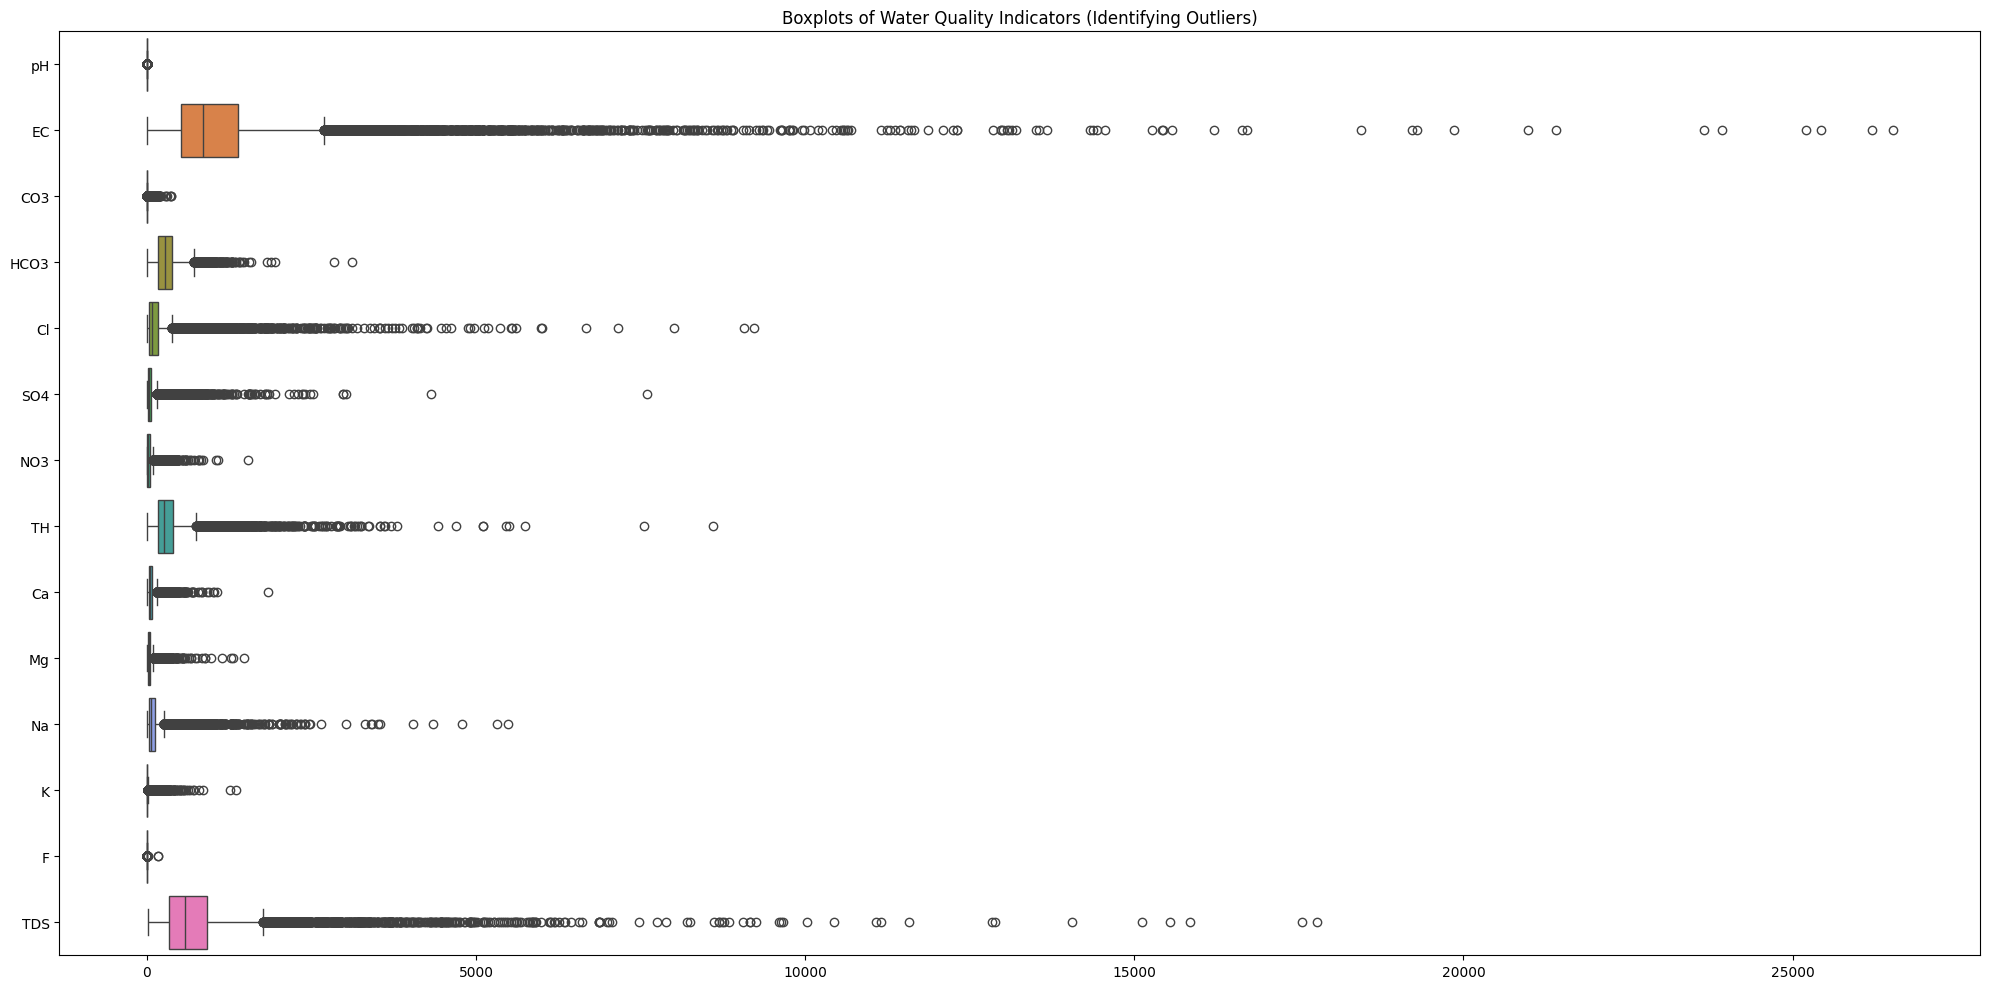

In [14]:
# Define water quality indicators
quality_indicators = ['pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F', 'TDS']

# 1. Distribution plots for water quality indicators
plt.figure(figsize=(20, 15))
for i, column in enumerate(quality_indicators):
    plt.subplot(4, 4, i+1)

    # Plot histogram with KDE
    sns.histplot(data[column], kde=True, bins=30)

    # Add mean and median lines
    plt.axvline(data[column].mean(), color='r', linestyle='--', label=f'Mean: {data[column].mean():.2f}')
    plt.axvline(data[column].median(), color='g', linestyle='-.', label=f'Median: {data[column].median():.2f}')

    plt.title(f'Distribution of {column}')
    plt.legend(fontsize='small')

plt.tight_layout()
plt.show()

# 2. Box plots to identify outliers in water quality indicators
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[quality_indicators], orient='h')
plt.title('Boxplots of Water Quality Indicators (Identifying Outliers)')
plt.tight_layout()
plt.show()

In [15]:
# Load the dataset
# Replace 'water_quality_data.csv' with the actual file path
data = pd.read_csv('water_quality_data.csv')

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:")
display(data.head())

# Check for missing values
print("\nMissing values per column:")
display(data.isnull().sum())

# Display statistics
print("\nDataset Statistics:")
display(data.describe())

Dataset Shape: (19029, 24)

First 5 rows:


,Well_ID,State,District,Block,Village,Latitude,Longitude,Year,pH,EC,...,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI,Water Quality Classification
0,W232200071580001,Gujarat,Ahmedabad,Mandal,Dalod,NaN,NaN,2020,8.20,16640.0,...,26.00,1451.0,152.0,260.0,3535.0,45.0,1.00,11149,4361.44080,Unsuitable for Drinking
1,W254029084355301,Himachal Pradesh,Solan,Nallagarh,JAGATPUR,31.1594,76.678500,2019,8.44,299.0,...,2.70,84.0,17.0,10.0,39.0,2.4,0.20,262,85.80466,Good
2,W193530074180001,Maharashtra,Ahmednagar,SANGAMNER,Kokangaon,74.3000,19.591667,2022,7.90,1315.0,...,18.20,465.0,80.2,64.4,88.3,1.6,0.53,372,280.04130,Very Poor yet Drinkable
3,W231620072033001,Gujarat,Ahmedabad,Viramgam,Endla,NaN,NaN,2020,7.40,715.0,...,0.23,280.0,56.0,34.0,47.0,11.0,0.46,479,195.11649,Poor
4,W251908084361501,Himachal Pradesh,Solan,Nallagarh,BARUNA,31.1540,76.638400,2019,8.40,270.0,...,10.00,116.0,10.0,18.0,23.0,1.0,0.12,262,81.77860,Good



Missing values per column:


,0
Well_ID,3785
State,0
District,0
Block,1119
Village,1
Latitude,389
Longitude,390
Year,0
pH,0
EC,0



Dataset Statistics:


,Latitude,Longitude,Year,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI
count,1.864000e+04,1.863900e+04,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000
mean,1.509049e+02,4.021432e+03,2020.286195,7.713495,1191.620744,3.326689,296.774490,171.843482,68.087940,35.114294,327.843466,65.114035,40.505256,113.673866,13.465496,0.595598,723.774239,305.291789
std,1.529204e+04,5.401512e+05,1.314794,0.491413,1348.094278,15.496995,180.861685,349.922000,148.853626,55.488528,310.386082,62.018322,49.654295,200.551600,38.839328,1.818577,755.575601,315.477116
min,0.000000e+00,0.000000e+00,2019.000000,2.800000,2.290000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,-0.160000,15.000000,9.043604
25%,1.998330e+01,2.522500e+01,2019.000000,7.450000,524.000000,0.000000,177.000000,32.000000,13.000000,4.460000,165.000000,28.100000,15.000000,28.000000,1.700000,0.206000,345.000000,146.642420
50%,2.417842e+01,7.617500e+01,2020.000000,7.720000,860.000000,0.000000,281.000000,78.000000,30.790000,18.000000,260.000000,50.100000,29.000000,60.400000,3.630000,0.430000,587.000000,232.078880
75%,7.571110e+01,7.953710e+01,2022.000000,8.000000,1390.000000,0.000000,390.400000,175.000000,69.000000,43.000000,400.000000,80.000000,49.800000,121.000000,9.510000,0.770000,913.000000,359.718240
max,2.087833e+06,7.374400e+07,2022.000000,10.920000,26520.000000,368.000000,3112.000000,9217.000000,7601.000000,1534.900000,8606.880000,1840.000000,1483.500000,5489.000000,1353.000000,168.000000,17768.000000,6850.888720


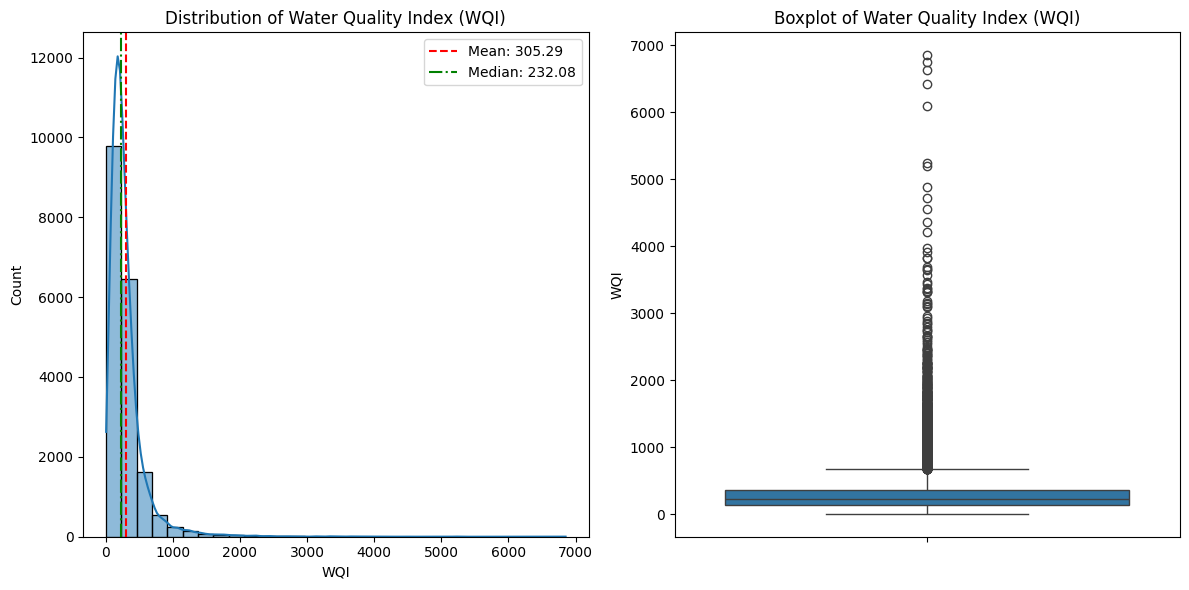

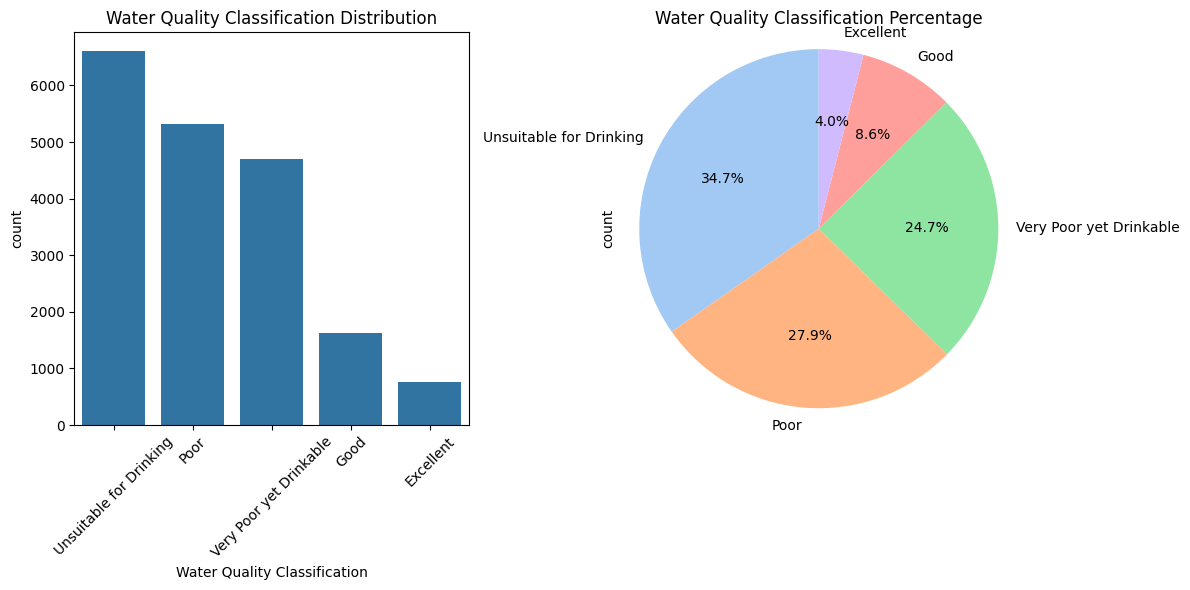

In [18]:
# 3. Distribution of WQI (target variable)
plt.figure(figsize=(12, 6))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(data['WQI'], kde=True, bins=30)
plt.axvline(data['WQI'].mean(), color='r', linestyle='--', label=f'Mean: {data["WQI"].mean():.2f}')
plt.axvline(data['WQI'].median(), color='g', linestyle='-.', label=f'Median: {data["WQI"].median():.2f}')
plt.title('Distribution of Water Quality Index (WQI)')
plt.legend()

# Box plot for WQI
plt.subplot(1, 2, 2)
sns.boxplot(y=data['WQI'])
plt.title('Boxplot of Water Quality Index (WQI)')

plt.tight_layout()
plt.show()

# 4. Distribution of Water Quality Classification (categorical target)
plt.figure(figsize=(12, 6))

# Bar plot
plt.subplot(1, 2, 1)
order = data['Water Quality Classification'].value_counts().index
sns.countplot(x='Water Quality Classification', data=data, order=order)
plt.title('Water Quality Classification Distribution')
plt.xticks(rotation=45)

# Pie chart
plt.subplot(1, 2, 2)
data['Water Quality Classification'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.axis('equal')
plt.title('Water Quality Classification Percentage')

plt.tight_layout()
plt.show()

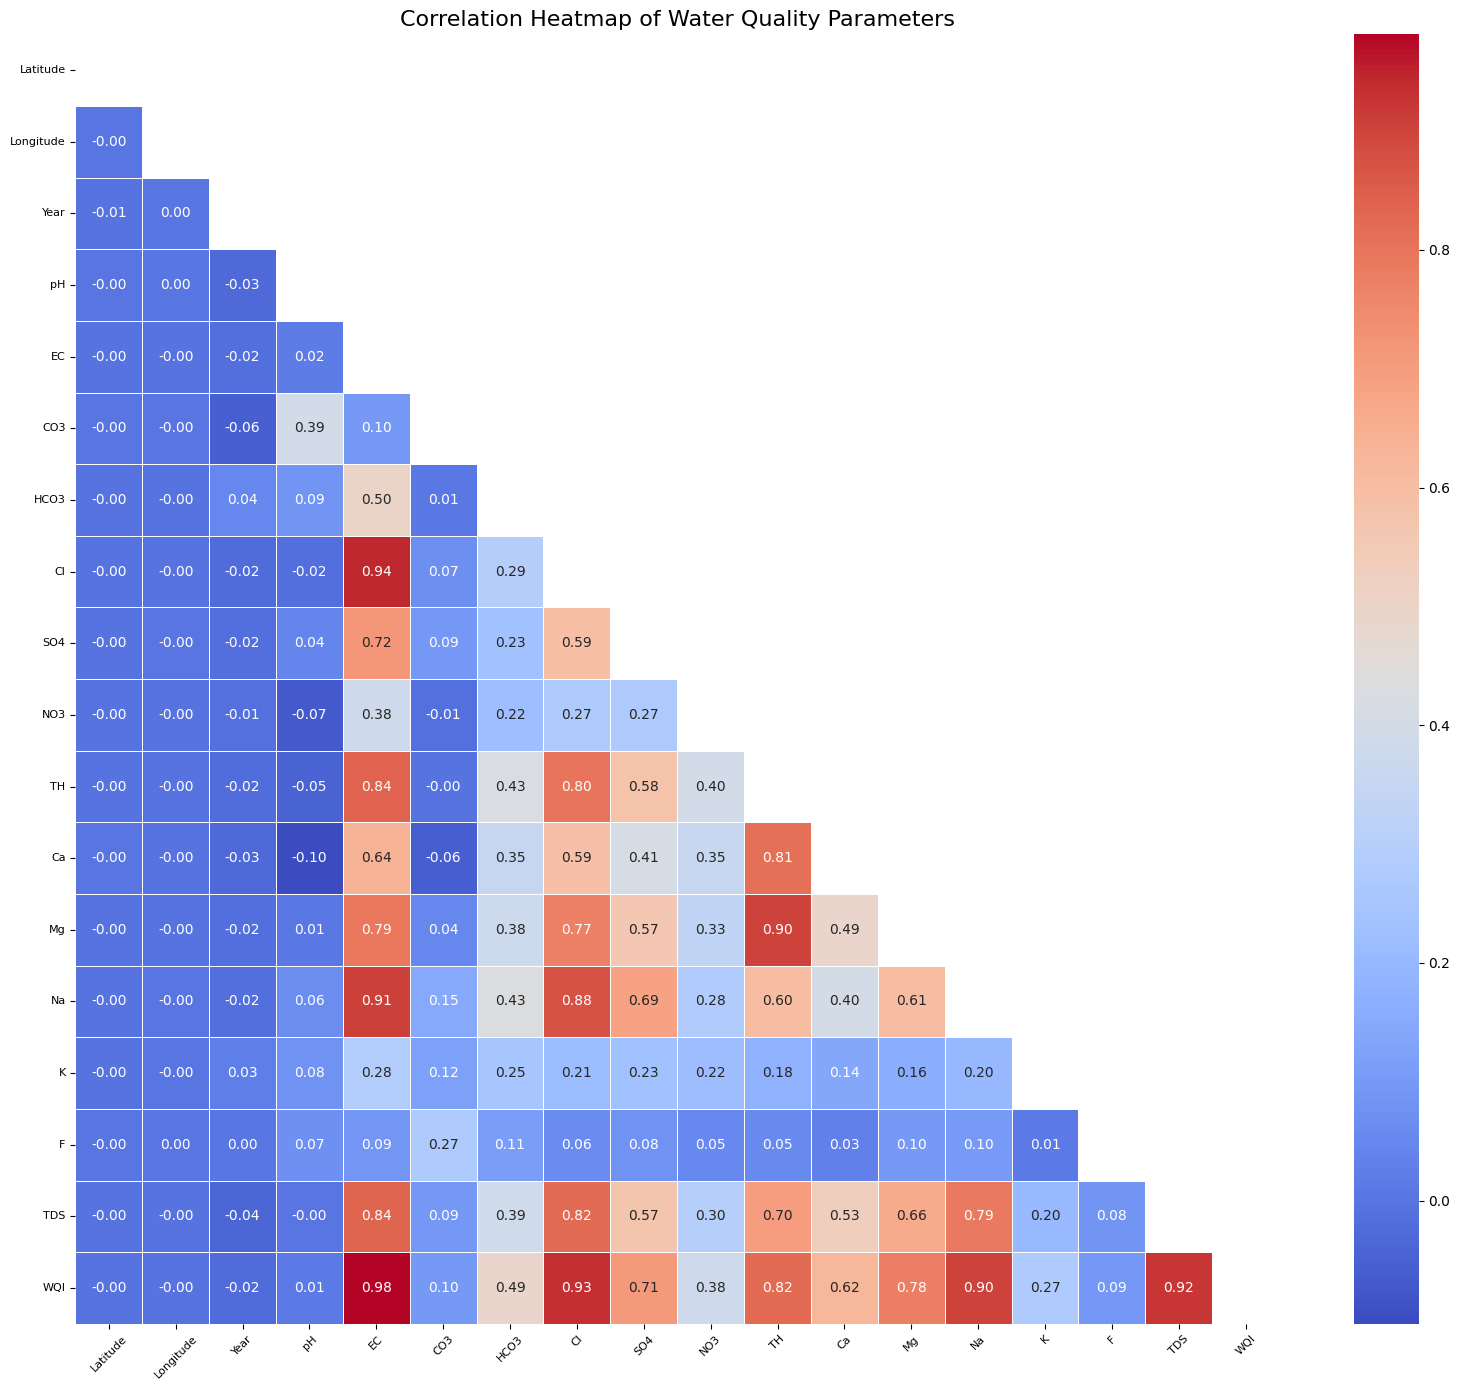


Top correlations with Water Quality Index (WQI):


,WQI
WQI,1.000000
EC,0.981442
Cl,0.932176
TDS,0.924358
Na,0.903628
TH,0.822221
Mg,0.776863
SO4,0.705896
Ca,0.624723
HCO3,0.493898


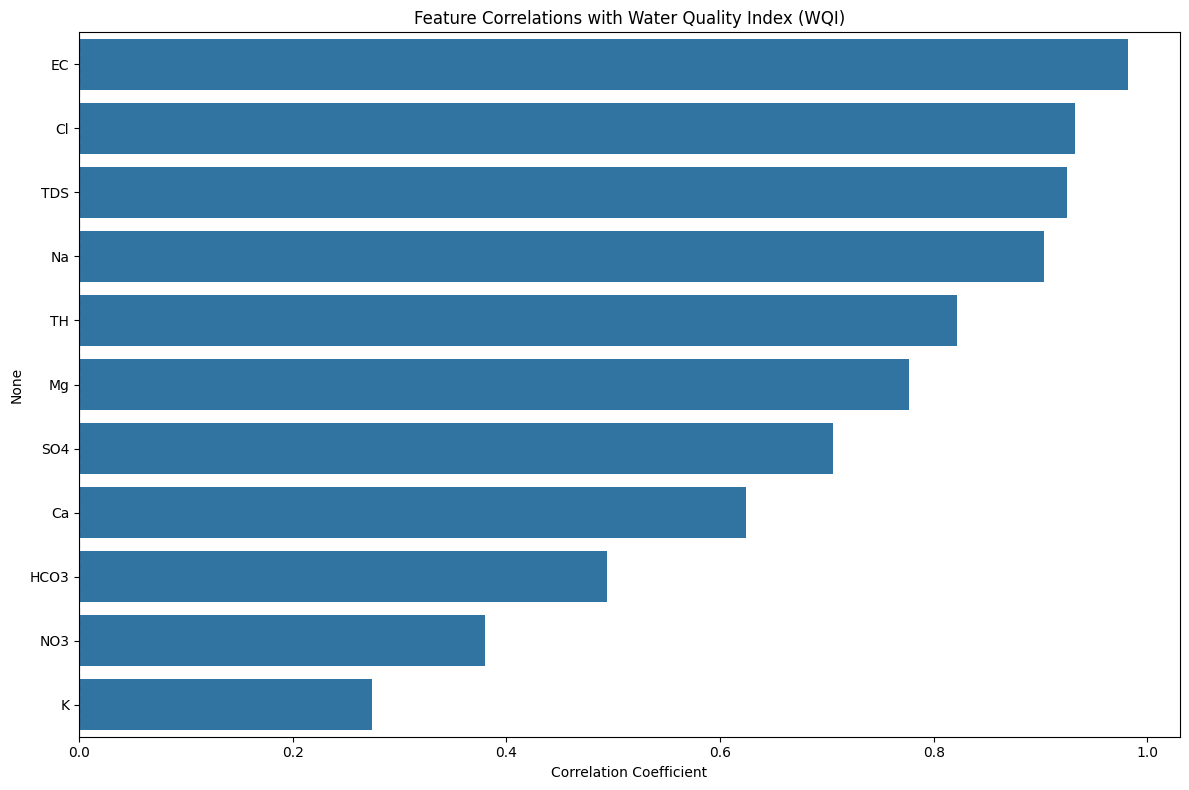

In [19]:
# 5. Correlation analysis
# Compute the correlation matrix
plt.figure(figsize=(16, 14))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Use a mask for the upper triangle
mask = np.triu(correlation_matrix)

# Draw the heatmap with a color bar
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap of Water Quality Parameters', fontsize=16)
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# 6. Top correlations with the target variable (WQI)
wqi_correlations = correlation_matrix['WQI'].sort_values(ascending=False)
print("\nTop correlations with Water Quality Index (WQI):")
display(wqi_correlations)

# Visualize top correlations with WQI
plt.figure(figsize=(12, 8))
wqi_corr = wqi_correlations.drop('WQI')  # Remove self-correlation
wqi_corr = wqi_corr[abs(wqi_corr) > 0.1]  # Filter for significant correlations
sns.barplot(x=wqi_corr.values, y=wqi_corr.index)
plt.title('Feature Correlations with Water Quality Index (WQI)')
plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

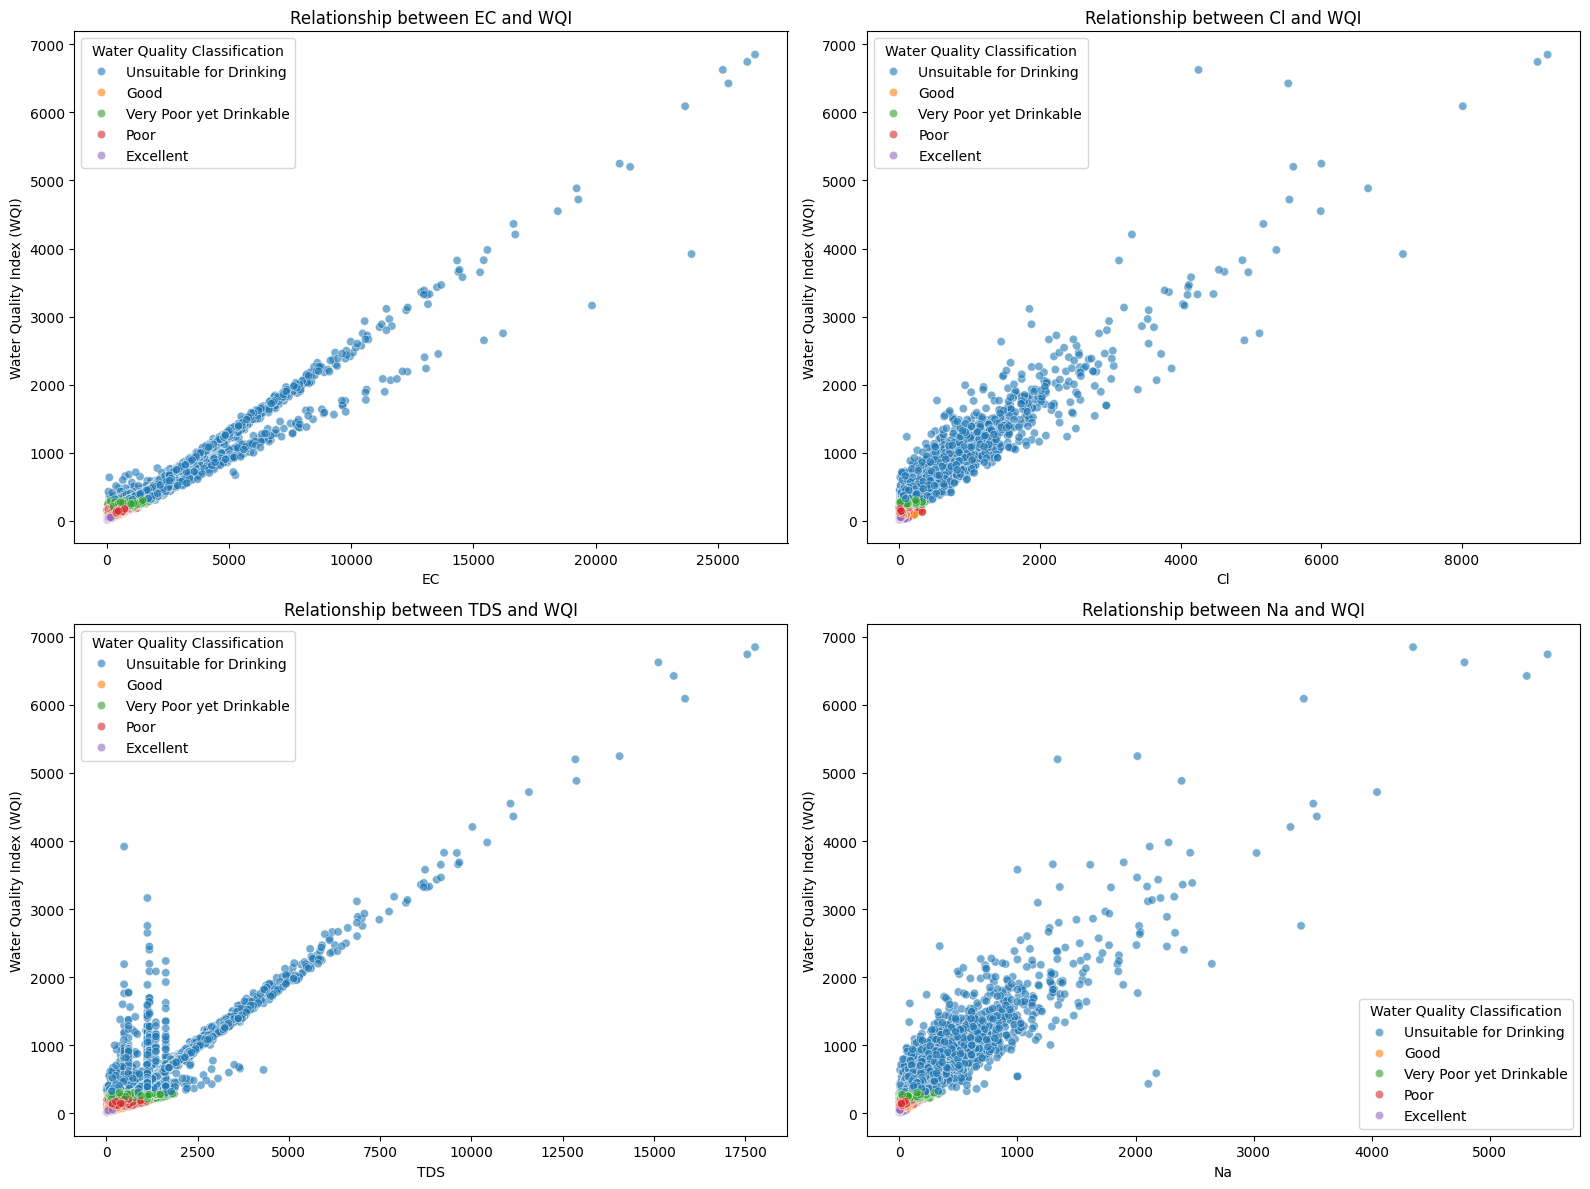

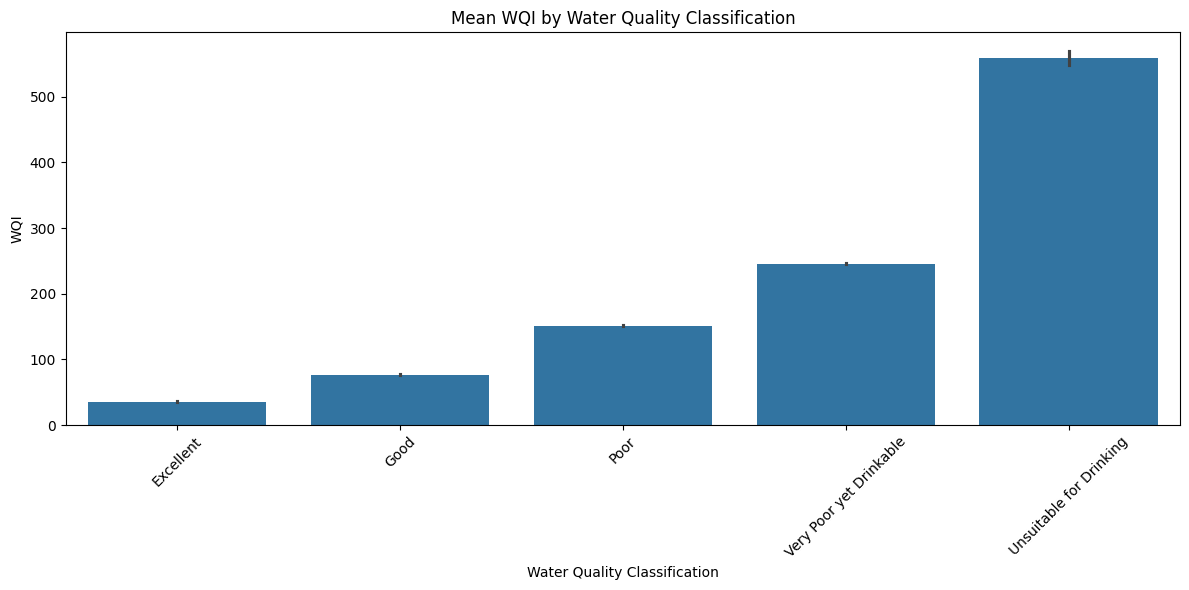

In [21]:
# 7. Relationship between important features and WQI
# Find the top 4 most correlated features with WQI
top_correlated_features = wqi_correlations.drop('WQI').abs().sort_values(ascending=False).head(4).index.tolist()

plt.figure(figsize=(16, 12))
for i, feature in enumerate(top_correlated_features):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=data[feature], y=data['WQI'], alpha=0.6, hue='Water Quality Classification', data=data)
    plt.title(f'Relationship between {feature} and WQI')
    plt.xlabel(feature)
    plt.ylabel('Water Quality Index (WQI)')
plt.tight_layout()
plt.show()

# 8. Mean WQI values by Water Quality Classification
plt.figure(figsize=(12, 6))
sns.barplot(x='Water Quality Classification', y='WQI', data=data,
            order=data.groupby('Water Quality Classification')['WQI'].mean().sort_values().index)
plt.title('Mean WQI by Water Quality Classification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

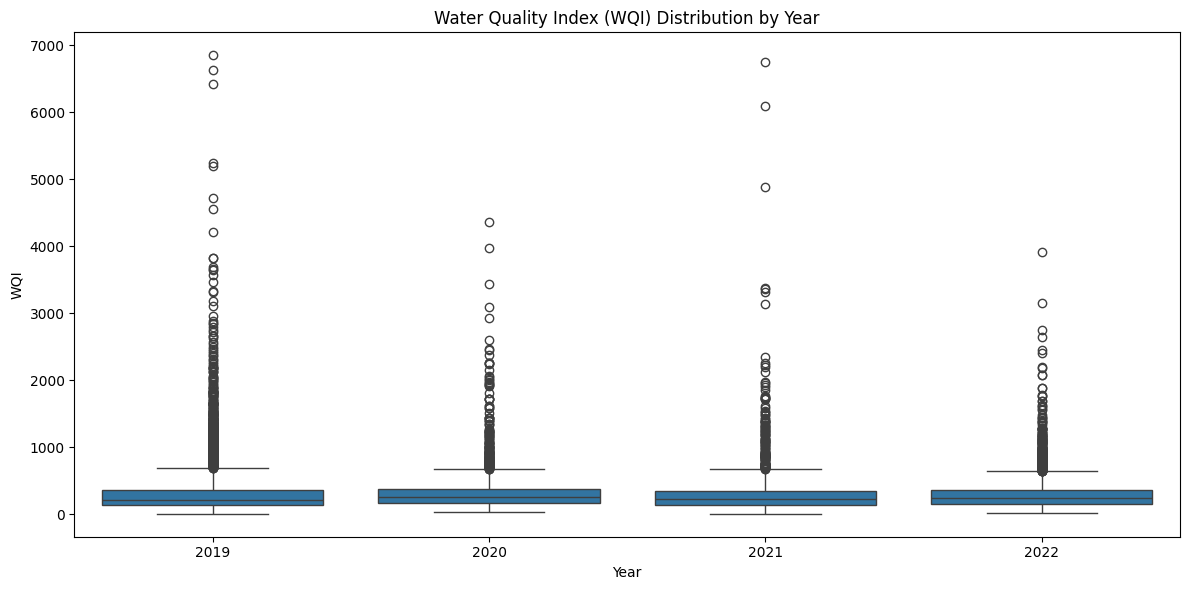

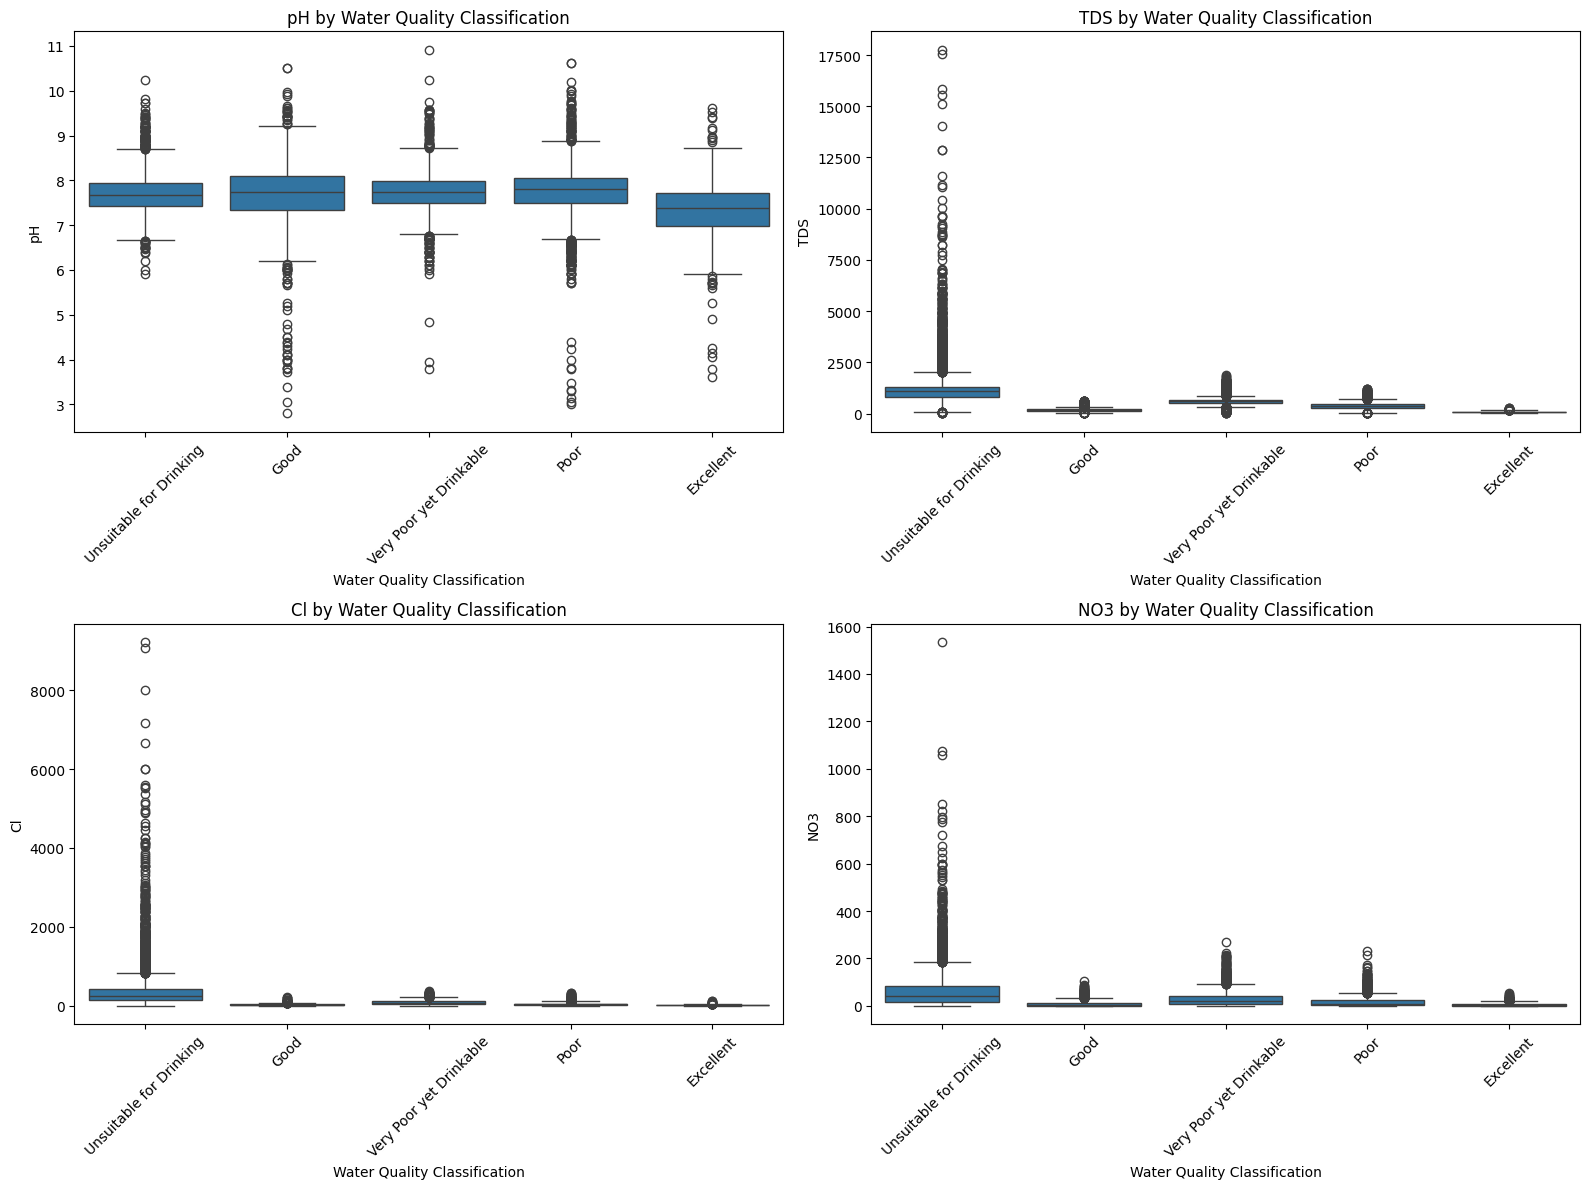

In [23]:
# 9. Temporal analysis - WQI trends over years
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='WQI', data=data)
plt.title('Water Quality Index (WQI) Distribution by Year')
plt.tight_layout()
plt.show()

# 10. Feature distributions by Water Quality Classification
# Select a few important water quality indicators
key_indicators = ['pH', 'TDS', 'Cl', 'NO3']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(key_indicators):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Water Quality Classification', y=feature, data=data)
    plt.title(f'{feature} by Water Quality Classification')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Highly correlated features (potential multicollinearity):


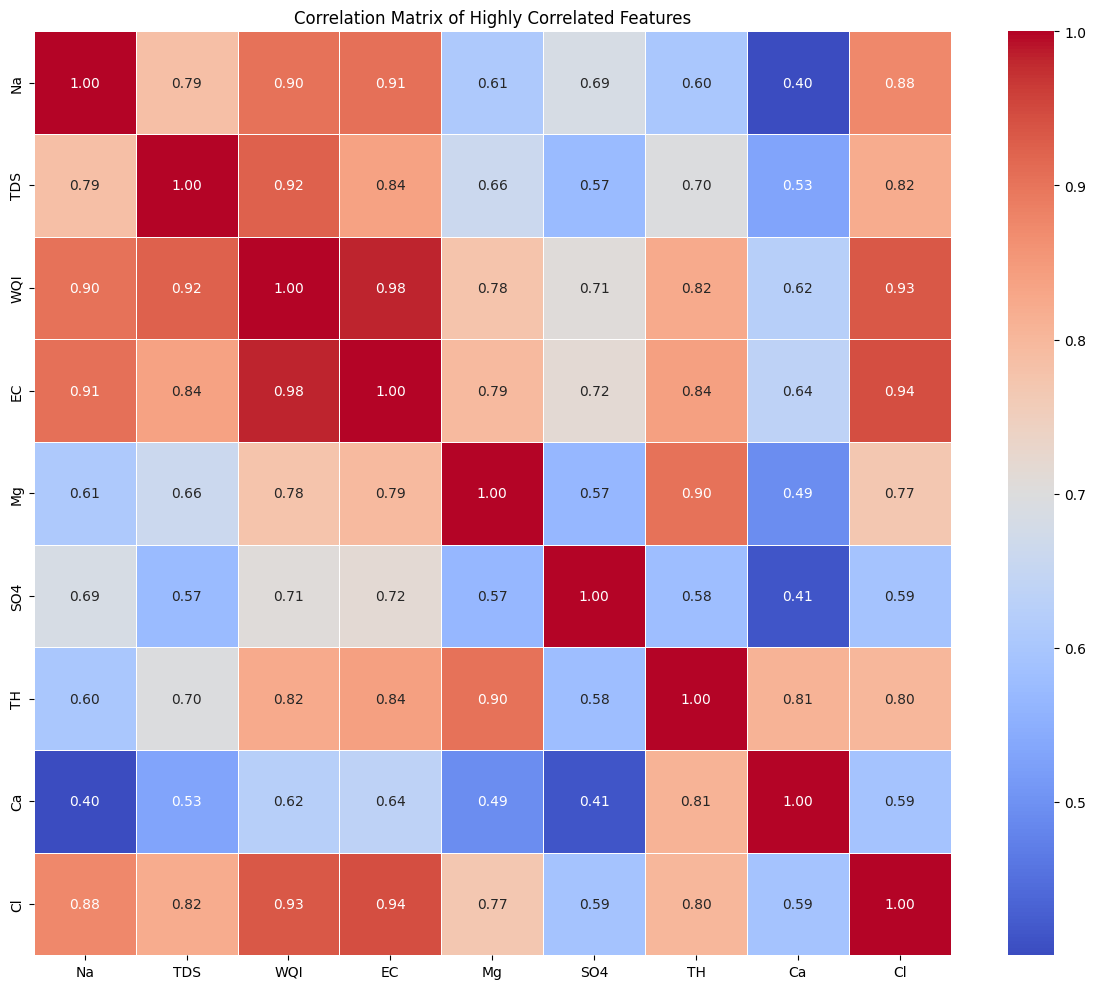

Strong correlation: TDS and Na: 0.79
Strong correlation: WQI and Na: 0.90
Strong correlation: WQI and TDS: 0.92
Strong correlation: EC and Na: 0.91
Strong correlation: EC and TDS: 0.84
Strong correlation: EC and WQI: 0.98
Strong correlation: Mg and WQI: 0.78
Strong correlation: Mg and EC: 0.79
Strong correlation: SO4 and WQI: 0.71
Strong correlation: SO4 and EC: 0.72
Strong correlation: TH and WQI: 0.82
Strong correlation: TH and EC: 0.84
Strong correlation: TH and Mg: 0.90
Strong correlation: Ca and TH: 0.81
Strong correlation: Cl and Na: 0.88
Strong correlation: Cl and TDS: 0.82
Strong correlation: Cl and WQI: 0.93
Strong correlation: Cl and EC: 0.94
Strong correlation: Cl and Mg: 0.77
Strong correlation: Cl and TH: 0.80


In [24]:
# 11. Check for multicollinearity with a more focused correlation heatmap
# Select the top correlated features
high_corr_threshold = 0.7
high_corr_features = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            high_corr_features.extend([colname_i, colname_j])

high_corr_features = list(set(high_corr_features))
if high_corr_features:
    print("\nHighly correlated features (potential multicollinearity):")

    # Create a correlation matrix for highly correlated features
    plt.figure(figsize=(12, 10))
    high_corr_matrix = data[high_corr_features].corr()
    sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix of Highly Correlated Features')
    plt.tight_layout()
    plt.show()

    # Print pairs with high correlation
    for i in range(len(high_corr_matrix.columns)):
        for j in range(i):
            if abs(high_corr_matrix.iloc[i, j]) > high_corr_threshold:
                print(f"Strong correlation: {high_corr_matrix.columns[i]} and {high_corr_matrix.columns[j]}: {high_corr_matrix.iloc[i, j]:.2f}")
else:
    print("\nNo highly correlated feature pairs found (threshold: 0.7)")

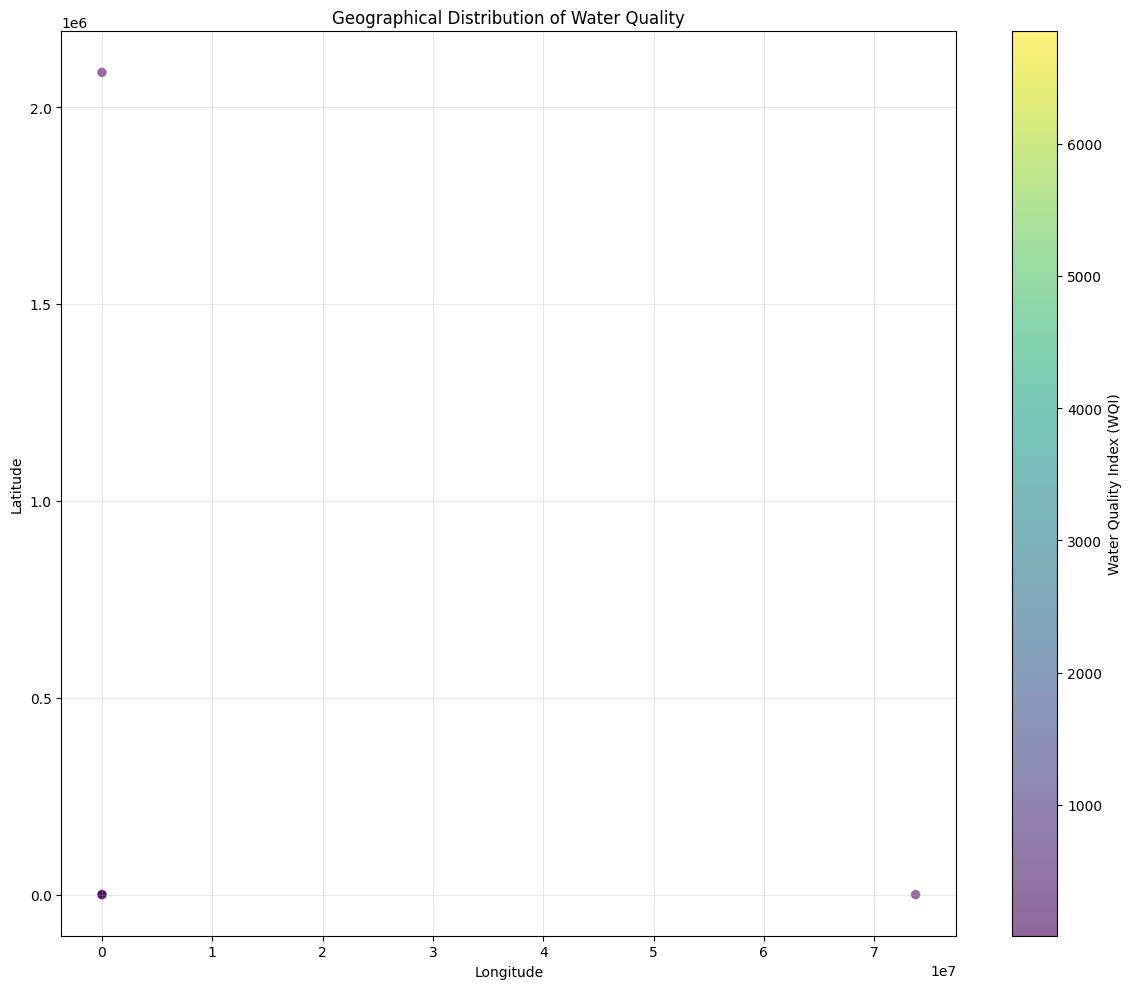


=== EDA Summary ===
1. Dataset contains 19029 samples with 24 features
2. Missing values: 5684 total missing values
3. Water Quality Classifications: 5 unique classes
4. WQI range: 9.04 to 6850.89, with mean 305.29
5. Most correlated feature with WQI: EC (r = 0.98)
6. Temporal analysis: There appears to be temporal variation in water quality over the years.


In [26]:
# 12. Geographical distribution of water quality
if 'Latitude' in data.columns and 'Longitude' in data.columns:
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(data['Longitude'], data['Latitude'],
                         c=data['WQI'], cmap='viridis',
                         alpha=0.6, s=50, edgecolors='w', linewidth=0.5)
    plt.colorbar(scatter, label='Water Quality Index (WQI)')
    plt.title('Geographical Distribution of Water Quality')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 13. Summary of findings
print("\n=== EDA Summary ===")
print(f"1. Dataset contains {data.shape[0]} samples with {data.shape[1]} features")
print(f"2. Missing values: {data.isnull().sum().sum()} total missing values")
print(f"3. Water Quality Classifications: {data['Water Quality Classification'].nunique()} unique classes")
print(f"4. WQI range: {data['WQI'].min():.2f} to {data['WQI'].max():.2f}, with mean {data['WQI'].mean():.2f}")

# Most correlated feature with WQI
top_feature = wqi_correlations.drop('WQI').abs().sort_values(ascending=False).index[0]
top_corr = wqi_correlations[top_feature]
print(f"5. Most correlated feature with WQI: {top_feature} (r = {top_corr:.2f})")

# Check if there's a temporal trend
yearly_wqi = data.groupby('Year')['WQI'].mean()
if yearly_wqi.max() - yearly_wqi.min() > yearly_wqi.mean() * 0.1:
    trend = "There appears to be temporal variation in water quality over the years."
else:
    trend = "No strong temporal trend observed in water quality over the years."
print(f"6. Temporal analysis: {trend}")

In [27]:
# 4.1 Handle missing values with more sophisticated approach
print("\nHandling missing values...")

# For numerical features, use a more robust approach
# Create an imputer for different feature groups based on their characteristics
# For water quality indicators, using median is generally better as it's more robust to outliers
imputer_wqi = SimpleImputer(strategy='median')
data[quality_indicators] = imputer_wqi.fit_transform(data[quality_indicators])

# For coordinates, we could use mean or a more specific imputation if needed
if 'Latitude' in data.columns and 'Longitude' in data.columns:
    coord_cols = ['Latitude', 'Longitude']
    coord_mask = data[coord_cols].isna().any(axis=1)
    if coord_mask.sum() > 0:
        print(f"Found {coord_mask.sum()} rows with missing coordinates")
        # Could implement more sophisticated handling like using region averages
        imputer_coords = SimpleImputer(strategy='mean')
        data[coord_cols] = imputer_coords.fit_transform(data[coord_cols])

# For temporal data (Year), use most frequent value
if 'Year' in data.columns and data['Year'].isna().sum() > 0:
    imputer_year = SimpleImputer(strategy='most_frequent')
    data[['Year']] = imputer_year.fit_transform(data[['Year']])

# 4.2 Handle outliers in features
print("\nHandling outliers in water quality indicators...")
for col in quality_indicators:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Instead of removing outliers, cap them
    data[col] = data[col].clip(lower_bound, upper_bound)

    # Create flag features for outliers if needed
    data[f'{col}_was_outlier'] = ((data[col] == lower_bound) | (data[col] == upper_bound)).astype(int)

# 4.3 Feature Engineering
print("\nPerforming feature engineering...")

# Add some domain-specific ratios and combinations that may be meaningful for water quality
# These are based on common water quality relationships

# Sodium Adsorption Ratio (SAR)
if all(col in data.columns for col in ['Na', 'Ca', 'Mg']):
    # Convert from meq/L to mmol/L if needed, assuming data is already in correct units
    data['SAR'] = data['Na'] / np.sqrt((data['Ca'] + data['Mg']) / 2)
    print("Added Sodium Adsorption Ratio (SAR)")

# Total Dissolved Solids to Electrical Conductivity ratio
if all(col in data.columns for col in ['TDS', 'EC']) and (data['EC'] != 0).all():
    data['TDS_EC_ratio'] = data['TDS'] / data['EC']
    print("Added TDS/EC ratio")

# Calcium to Magnesium ratio
if all(col in data.columns for col in ['Ca', 'Mg']) and (data['Mg'] != 0).all():
    data['Ca_Mg_ratio'] = data['Ca'] / data['Mg']
    print("Added Ca/Mg ratio")

# Anion-Cation balance
anions = ['Cl', 'SO4', 'NO3', 'F', 'HCO3', 'CO3']
cations = ['Ca', 'Mg', 'Na', 'K']

if all(col in data.columns for col in anions + cations):
    # This is simplified and assumes values are in same units (meq/L)
    data['anion_sum'] = data[anions].sum(axis=1)
    data['cation_sum'] = data[cations].sum(axis=1)

    # Balance error percentage
    total_ions = data['anion_sum'] + data['cation_sum']
    data['ion_balance_error'] = abs(data['cation_sum'] - data['anion_sum']) / total_ions * 100
    print("Added ion balance calculations")


Handling missing values...
Found 391 rows with missing coordinates

Handling outliers in water quality indicators...

Performing feature engineering...
Added Sodium Adsorption Ratio (SAR)
Added TDS/EC ratio
Added ion balance calculations


In [29]:
# 4.4 Advanced categorical encoding
print("\nEncoding categorical variables...")

# Encode geographical identifiers with a more sophisticated approach
categorical_columns = ['State', 'District', 'Block', 'Village']
encoded_categorical_features = []

for col in categorical_columns:
    if col in data.columns:
        # Get value counts to identify rare categories
        counts = data[col].value_counts()
        threshold = len(data) * 0.01  # 1% threshold

        # Replace rare categories with 'Other'
        mask = data[col].isin(counts[counts < threshold].index)
        if mask.any():
            print(f"Grouping {mask.sum()} rare values in {col} as 'Other'")
            data.loc[mask, col] = 'Other'

        # Encode with both label encoding and one-hot encoding
        # Label encoding
        label_encoder = LabelEncoder()
        data[f'{col}_encoded'] = label_encoder.fit_transform(data[col])
        encoded_categorical_features.append(f'{col}_encoded')

        # One-hot encoding with handling for high cardinality
        if data[col].nunique() < 10:  # Only one-hot encode if not too many categories
            onehot_encoded = pd.get_dummies(data[col], prefix=col, drop_first=True)
            data = pd.concat([data, onehot_encoded], axis=1)
            encoded_categorical_features.extend(onehot_encoded.columns.tolist())

# 4.5 Encode Target Variables
print("\nEncoding target variables...")

# For Water Quality Classification
label_encoder = LabelEncoder()
data['Water_Quality_Classification_encoded'] = label_encoder.fit_transform(data['Water Quality Classification'])
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class mapping:", class_mapping)


Encoding categorical variables...

Encoding target variables...
Class mapping: {'Excellent': np.int64(0), 'Good': np.int64(1), 'Poor': np.int64(2), 'Unsuitable for Drinking': np.int64(3), 'Very Poor yet Drinkable': np.int64(4)}


In [30]:
# 4.6 Feature Selection
print("\nPerforming feature selection...")

# Remove highly correlated features to reduce multicollinearity
correlation_matrix = data[quality_indicators].corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

if to_drop:
    print(f"Dropping highly correlated features: {to_drop}")
    # Save the features but don't use them for modeling
    dropped_features = data[to_drop].copy()
    quality_indicators = [col for col in quality_indicators if col not in to_drop]

# Define final feature sets
print("\nFinalizing feature sets...")

# Numerical features including engineered features
numerical_features = quality_indicators + ['Latitude', 'Longitude', 'Year']

# Add engineered features
engineered_features = [col for col in ['SAR', 'TDS_EC_ratio', 'Ca_Mg_ratio', 'ion_balance_error']
                       if col in data.columns]
numerical_features.extend(engineered_features)

# Remove any duplicates
numerical_features = list(dict.fromkeys(numerical_features))

# Flag features for outliers
flag_features = [col for col in data.columns if col.endswith('_was_outlier')]

# All features
all_features = numerical_features + encoded_categorical_features + flag_features
print(f"Final feature set contains {len(all_features)} features")


Performing feature selection...
Dropping highly correlated features: ['Cl']

Finalizing feature sets...
Final feature set contains 38 features


In [31]:
# 4.7 Create train/validation/test split with stratification
print("\nCreating data splits...")

# Create X (features) and y (targets)
X = data[all_features].values
y_regression = data['WQI'].values
y_classification = data['Water_Quality_Classification_encoded'].values

# One-hot encode classification targets for neural network
num_classes = len(np.unique(y_classification))
y_classification_onehot = to_categorical(y_classification, num_classes=num_classes)

# Scale features with robust scaler to handle potential remaining outliers
scaler = RobustScaler()  # Use RobustScaler instead of StandardScaler
X_scaled = scaler.fit_transform(X)

# Split into train and temp (validation + test)
X_train, X_temp, y_reg_train, y_reg_temp, y_cls_train, y_cls_temp = train_test_split(
    X_scaled, y_regression, y_classification_onehot, test_size=0.3, random_state=42,
    stratify=y_classification  # Stratify by classification targets
)

# Split temp into validation and test
X_val, X_test, y_reg_val, y_reg_test, y_cls_val, y_cls_test = train_test_split(
    X_temp, y_reg_temp, y_cls_temp, test_size=0.5, random_state=42,
    stratify=np.argmax(y_cls_temp, axis=1)  # Stratify by classification targets
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Creating data splits...
Training set: 13320 samples
Validation set: 2854 samples
Test set: 2855 samples


In [32]:
def create_regression_model(input_shape):
    # Use smaller initial layer sizes and a different initialization
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,),
              kernel_initializer='he_normal'),  # Changed initializer and reduced size
        BatchNormalization(),
        Dropout(0.2),  # Reduced dropout rate
        Dense(32, activation='relu', kernel_initializer='he_normal'),
        BatchNormalization(),
        Dropout(0.1),  # Reduced dropout rate
        Dense(16, activation='relu', kernel_initializer='he_normal'),
        Dense(1)  # Output layer for regression
    ])

    # Use gradient clipping to prevent exploding gradients
    optimizer = Adam(learning_rate=0.0005, clipnorm=1.0)

    model.compile(
        optimizer=optimizer,
        loss='mean_squared_error',
        metrics=['mae']
    )

    return model

# Clean regression data to prevent NaN issues
def clean_regression_data(X_data, y_data):
    # Check if any target values are NaN or infinite
    valid_indices = np.isfinite(y_data)
    X_cleaned = X_data[valid_indices]
    y_cleaned = y_data[valid_indices]

    # Remove outliers from targets (optional)
    q1, q3 = np.percentile(y_cleaned, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_mask = (y_cleaned >= lower_bound) & (y_cleaned <= upper_bound)
    X_cleaned = X_cleaned[outlier_mask]
    y_cleaned = y_cleaned[outlier_mask]

    # Check if any features have NaN or infinite values
    X_cleaned = np.nan_to_num(X_cleaned, nan=0.0)

    return X_cleaned, y_cleaned

In [33]:
# Clean the data
X_train_clean, y_reg_train_clean = clean_regression_data(X_train, y_reg_train)
X_val_clean, y_reg_val_clean = clean_regression_data(X_val, y_reg_val)

print(f"Original training data shape: {X_train.shape}, clean data shape: {X_train_clean.shape}")
print(f"Any NaN in features: {np.isnan(X_train_clean).any()}")
print(f"Any NaN in targets: {np.isnan(y_reg_train_clean).any()}")
print(f"Target range: Min={y_reg_train_clean.min()}, Max={y_reg_train_clean.max()}")

# Create and train the regression model
input_shape = X_train_clean.shape[1]
regression_model = create_regression_model(input_shape)

# Set up callbacks for training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    min_delta=0.001  # Minimum required improvement
)

model_checkpoint = ModelCheckpoint(
    'best_regression_model.h5',
    save_best_only=True,
    monitor='val_loss'
)

# Add learning rate reduction on plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

# Add callback to stop training if NaN loss is encountered
class TerminateOnNaN(tf.keras.callbacks.Callback):
    def on_batch_end(self, batch, logs=None):
        logs = logs or {}
        loss = logs.get('loss')
        if loss is not None and np.isnan(loss):
            print('NaN loss encountered, terminating training')
            self.model.stop_training = True

# Train the model
regression_history = regression_model.fit(
    X_train_clean, y_reg_train_clean,
    epochs=50,
    batch_size=16,
    validation_data=(X_val_clean, y_reg_val_clean),  # Use validation set instead of split
    callbacks=[early_stopping, model_checkpoint, reduce_lr, TerminateOnNaN()],
    verbose=1
)

Original training data shape: (13320, 39), clean data shape: (12456, 39)
Any NaN in features: False
Any NaN in targets: False
Target range: Min=9.0436036, Max=679.70222


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 74833.1016 - mae: 237.8141

779/779 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 74825.2891 - mae: 237.8028 - val_loss: 52425.7188 - val_mae: 205.0686 - learning_rate: 5.0000e-04
Epoch 2/50
772/779 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28893.0938 - mae: 147.4067

779/779 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 28796.7598 - mae: 147.0745 - val_loss: 8264.8965 - val_mae: 69.0545 - learning_rate: 5.0000e-04
Epoch 3/50
778/779 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6900.1724 - mae: 63.6715

779/779 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6898.4619 - mae: 63.6610 - val_loss: 3891.2844 - val_mae: 41.6066 - learning_rate: 5.0000e-04
Epoch 4/50
760/779 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4544.1167 - mae: 50.3305

779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4542.6172 - mae: 50.3102 - val_loss: 3817.8630 - val_mae: 42.9837 - learning_rate: 5.0000e-04
Epoch 5/50
770/779 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3837.7156 - mae: 45.7131

779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3838.3423 - mae: 45.7106 - val_loss: 3483.9314 - val_mae: 40.1920 - learning_rate: 5.0000e-04
Epoch 6/50
774/779 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3487.5642 - mae: 43.3622

779/779 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3488.4458 - mae: 43.3628 - val_loss: 3450.9524 - val_mae: 38.6715 - learning_rate: 5.0000e-04
Epoch 7/50
774/779 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3316.6008 - mae: 41.8155

779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3317.5017 - mae: 41.8166 - val_loss: 3382.1411 - val_mae: 37.7267 - learning_rate: 5.0000e-04
Epoch 8/50
763/779 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3047.2178 - mae: 39.6478

779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3050.0464 - mae: 39.6582 - val_loss: 3071.4832 - val_mae: 35.9744 - learning_rate: 5.0000e-04
Epoch 9/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2898.6936 - mae: 38.7347 - val_loss: 3337.2708 - val_mae: 38.2201 - learning_rate: 5.0000e-04
Epoch 10/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2625.2874 - mae: 36.3206 - val_loss: 3273.7673 - val_mae: 38.4312 - learning_rate: 5.0000e-04
Epoch 11/50
776/779 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2491.2300 - mae: 35.8856

779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2491.6614 - mae: 35.8862 - val_loss: 2909.9639 - val_mae: 35.4428 - learning_rate: 5.0000e-04
Epoch 12/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2360.2537 - mae: 34.3467 - val_loss: 3068.6990 - val_mae: 36.3411 - learning_rate: 5.0000e-04
Epoch 13/50
767/779 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2269.0117 - mae: 33.6643

779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2271.2866 - mae: 33.6748 - val_loss: 2865.1536 - val_mae: 36.0582 - learning_rate: 5.0000e-04
Epoch 14/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2144.0896 - mae: 33.0365 - val_loss: 3107.1399 - val_mae: 38.2509 - learning_rate: 5.0000e-04
Epoch 15/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2107.7898 - mae: 32.5799 - val_loss: 2985.1299 - val_mae: 37.9830 - learning_rate: 5.0000e-04
Epoch 16/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1987.0669 - mae: 31.7451 - val_loss: 2886.4282 - val_mae: 37.9159 - learning_rate: 5.0000e-04
Epoch 17/50
763/779 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1920.4901 - mae: 31.1840

779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1923.0785 - mae: 31.1950 - val_loss: 2667.4065 - val_mae: 36.6618 - learning_rate: 5.0000e-04
Epoch 18/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1888.0156 - mae: 30.9899

779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1888.1488 - mae: 30.9905 - val_loss: 2248.1331 - val_mae: 33.9300 - learning_rate: 5.0000e-04
Epoch 19/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1776.3496 - mae: 30.4579 - val_loss: 2349.0745 - val_mae: 36.1692 - learning_rate: 5.0000e-04
Epoch 20/50
772/779 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1663.7938 - mae: 29.7192

779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1664.5933 - mae: 29.7242 - val_loss: 2230.4846 - val_mae: 35.6092 - learning_rate: 5.0000e-04
Epoch 21/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1581.8022 - mae: 29.2936 - val_loss: 2568.3223 - val_mae: 38.6278 - learning_rate: 5.0000e-04
Epoch 22/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1554.0450 - mae: 28.9299 - val_loss: 2284.5664 - val_mae: 36.9358 - learning_rate: 5.0000e-04
Epoch 23/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1472.7506 - mae: 28.2219 - val_loss: 2366.9758 - val_mae: 38.8257 - learning_rate: 5.0000e-04
Epoch 24/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1453.3524 - mae: 28.0524 - val_loss: 2361.2512 - val_mae: 37.8314 - learning_rate: 5.0000e-04
Epoch 25/50
776/779 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1388.9670 - mae: 27.5972
Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
779/779 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1389.2231 - mae: 27.5993 

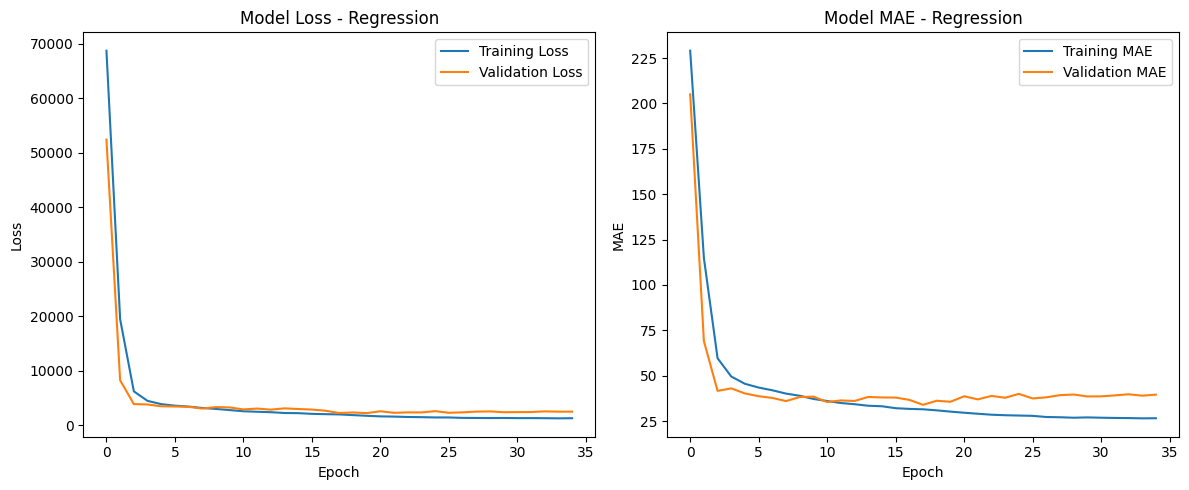

In [34]:
# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(regression_history.history['loss'], label='Training Loss')
plt.plot(regression_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss - Regression')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(regression_history.history['mae'], label='Training MAE')
plt.plot(regression_history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE - Regression')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
def create_classification_model(input_shape, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,),
              kernel_initializer='he_normal'),  # Better initialization
        BatchNormalization(),
        Dropout(0.2),  # Lower dropout
        Dense(32, activation='relu', kernel_initializer='he_normal'),
        BatchNormalization(),
        Dropout(0.1),  # Lower dropout
        Dense(16, activation='relu', kernel_initializer='he_normal'),
        Dense(num_classes, activation='softmax')  # Output layer for classification
    ])

    # Use gradient clipping to prevent exploding gradients
    optimizer = Adam(learning_rate=0.0005, clipnorm=1.0)

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Clean classification data
def clean_classification_data(X_data, y_data):
    # Check for NaN values in features
    valid_feature_indices = ~np.isnan(X_data).any(axis=1)
    X_cleaned = X_data[valid_feature_indices]
    y_cleaned = y_data[valid_feature_indices]

    # Check for NaN values in one-hot encoded targets
    valid_target_indices = ~np.isnan(y_cleaned).any(axis=1)
    X_cleaned = X_cleaned[valid_target_indices]
    y_cleaned = y_cleaned[valid_target_indices]

    # Replace any remaining NaNs in features
    X_cleaned = np.nan_to_num(X_cleaned, nan=0.0)

    return X_cleaned, y_cleaned

In [36]:
# Clean the data
X_train_clean_cls, y_cls_train_clean = clean_classification_data(X_train, y_cls_train)
X_val_clean_cls, y_cls_val_clean = clean_classification_data(X_val, y_cls_val)

print(f"Original training data shape: {X_train.shape}, clean data shape: {X_train_clean_cls.shape}")
print(f"Any NaN in features: {np.isnan(X_train_clean_cls).any()}")
print(f"Any NaN in targets: {np.isnan(y_cls_train_clean).any()}")

# Create and train the classification model
classification_model = create_classification_model(input_shape, num_classes)

# Set up callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    min_delta=0.001
)

model_checkpoint = ModelCheckpoint(
    'best_classification_model.h5',
    save_best_only=True,
    monitor='val_loss'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

# Train the model
classification_history = classification_model.fit(
    X_train_clean_cls, y_cls_train_clean,
    epochs=50,
    batch_size=16,
    validation_data=(X_val_clean_cls, y_cls_val_clean),
    callbacks=[early_stopping, model_checkpoint, reduce_lr, TerminateOnNaN()],
    verbose=1
)

Original training data shape: (13320, 39), clean data shape: (13320, 39)
Any NaN in features: False
Any NaN in targets: False
Epoch 1/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4803 - loss: 1.2759

833/833 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4804 - loss: 1.2756 - val_accuracy: 0.5007 - val_loss: 1.1865 - learning_rate: 5.0000e-04
Epoch 2/50
816/833 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7175 - loss: 0.6575

833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7178 - loss: 0.6567 - val_accuracy: 0.5519 - val_loss: 1.1647 - learning_rate: 5.0000e-04
Epoch 3/50
825/833 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7538 - loss: 0.5594

833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7539 - loss: 0.5593 - val_accuracy: 0.5708 - val_loss: 1.1073 - learning_rate: 5.0000e-04
Epoch 4/50
820/833 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7844 - loss: 0.5063

833/833 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7844 - loss: 0.5061 - val_accuracy: 0.5652 - val_loss: 1.0867 - learning_rate: 5.0000e-04
Epoch 5/50
821/833 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8015 - loss: 0.4735

833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8015 - loss: 0.4733 - val_accuracy: 0.5732 - val_loss: 1.0392 - learning_rate: 5.0000e-04
Epoch 6/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8129 - loss: 0.4451

833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8129 - loss: 0.4451 - val_accuracy: 0.5862 - val_loss: 0.9886 - learning_rate: 5.0000e-04
Epoch 7/50
823/833 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8225 - loss: 0.4255

833/833 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8225 - loss: 0.4254 - val_accuracy: 0.6086 - val_loss: 0.8140 - learning_rate: 5.0000e-04
Epoch 8/50
821/833 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8312 - loss: 0.3958

833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8312 - loss: 0.3958 - val_accuracy: 0.7022 - val_loss: 0.6354 - learning_rate: 5.0000e-04
Epoch 9/50
824/833 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8406 - loss: 0.3887

833/833 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8406 - loss: 0.3886 - val_accuracy: 0.7894 - val_loss: 0.5120 - learning_rate: 5.0000e-04
Epoch 10/50
819/833 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8465 - loss: 0.3722

833/833 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8465 - loss: 0.3720 - val_accuracy: 0.8097 - val_loss: 0.4347 - learning_rate: 5.0000e-04
Epoch 11/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8540 - loss: 0.3582 - val_accuracy: 0.7961 - val_loss: 0.4948 - learning_rate: 5.0000e-04
Epoch 12/50
814/833 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8648 - loss: 0.3396

833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8647 - loss: 0.3396 - val_accuracy: 0.8479 - val_loss: 0.3458 - learning_rate: 5.0000e-04
Epoch 13/50
820/833 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8694 - loss: 0.3263

833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8693 - loss: 0.3263 - val_accuracy: 0.8500 - val_loss: 0.3395 - learning_rate: 5.0000e-04
Epoch 14/50
831/833 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3223

833/833 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8713 - loss: 0.3223 - val_accuracy: 0.8514 - val_loss: 0.3321 - learning_rate: 5.0000e-04
Epoch 15/50
818/833 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8792 - loss: 0.3041

833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8792 - loss: 0.3041 - val_accuracy: 0.8630 - val_loss: 0.3219 - learning_rate: 5.0000e-04
Epoch 16/50
828/833 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8780 - loss: 0.3038

833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8780 - loss: 0.3038 - val_accuracy: 0.8714 - val_loss: 0.3004 - learning_rate: 5.0000e-04
Epoch 17/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8806 - loss: 0.2907 - val_accuracy: 0.8616 - val_loss: 0.3235 - learning_rate: 5.0000e-04
Epoch 18/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8849 - loss: 0.2851 - val_accuracy: 0.8633 - val_loss: 0.3234 - learning_rate: 5.0000e-04
Epoch 19/50
815/833 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8903 - loss: 0.2803

833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8903 - loss: 0.2802 - val_accuracy: 0.8655 - val_loss: 0.2964 - learning_rate: 5.0000e-04
Epoch 20/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8949 - loss: 0.2696 - val_accuracy: 0.8588 - val_loss: 0.3287 - learning_rate: 5.0000e-04
Epoch 21/50
817/833 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8973 - loss: 0.2609

833/833 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8973 - loss: 0.2609 - val_accuracy: 0.8742 - val_loss: 0.2908 - learning_rate: 5.0000e-04
Epoch 22/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8991 - loss: 0.2539 - val_accuracy: 0.8749 - val_loss: 0.2924 - learning_rate: 5.0000e-04
Epoch 23/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8980 - loss: 0.2596 - val_accuracy: 0.8676 - val_loss: 0.3194 - learning_rate: 5.0000e-04
Epoch 24/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8996 - loss: 0.2494 - val_accuracy: 0.8735 - val_loss: 0.2979 - learning_rate: 5.0000e-04
Epoch 25/50
822/833 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9007 - loss: 0.2452

833/833 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9007 - loss: 0.2451 - val_accuracy: 0.8889 - val_loss: 0.2651 - learning_rate: 5.0000e-04
Epoch 26/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9012 - loss: 0.2443 - val_accuracy: 0.8753 - val_loss: 0.2967 - learning_rate: 5.0000e-04
Epoch 27/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9082 - loss: 0.2315 - val_accuracy: 0.8735 - val_loss: 0.3026 - learning_rate: 5.0000e-04
Epoch 28/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9129 - loss: 0.2244 - val_accuracy: 0.8816 - val_loss: 0.2849 - learning_rate: 5.0000e-04
Epoch 29/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9129 - loss: 0.2191 - val_accuracy: 0.8819 - val_loss: 0.2871 - learning_rate: 5.0000e-04
Epoch 30/50
813/833 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9188 - loss: 0.2202
Epoch 30: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
833/833 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9188 - l

833/833 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9293 - loss: 0.1815 - val_accuracy: 0.9068 - val_loss: 0.2608 - learning_rate: 1.2500e-04
Epoch 37/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9275 - loss: 0.1861 - val_accuracy: 0.9082 - val_loss: 0.2697 - learning_rate: 1.2500e-04
Epoch 38/50
820/833 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9302 - loss: 0.1844

833/833 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9302 - loss: 0.1843 - val_accuracy: 0.9082 - val_loss: 0.2496 - learning_rate: 1.2500e-04
Epoch 39/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9350 - loss: 0.1757 - val_accuracy: 0.9096 - val_loss: 0.2570 - learning_rate: 1.2500e-04
Epoch 40/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9302 - loss: 0.1815 - val_accuracy: 0.9085 - val_loss: 0.2518 - learning_rate: 1.2500e-04
Epoch 41/50
815/833 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9317 - loss: 0.1833

833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9317 - loss: 0.1832 - val_accuracy: 0.9107 - val_loss: 0.2470 - learning_rate: 1.2500e-04
Epoch 42/50
824/833 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9358 - loss: 0.1727

833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9358 - loss: 0.1727 - val_accuracy: 0.9128 - val_loss: 0.2296 - learning_rate: 1.2500e-04
Epoch 43/50
828/833 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9370 - loss: 0.1705

833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9370 - loss: 0.1704 - val_accuracy: 0.9170 - val_loss: 0.1955 - learning_rate: 1.2500e-04
Epoch 44/50
819/833 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9393 - loss: 0.1677

833/833 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9393 - loss: 0.1677 - val_accuracy: 0.9215 - val_loss: 0.1937 - learning_rate: 1.2500e-04
Epoch 45/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9346 - loss: 0.1671 - val_accuracy: 0.9166 - val_loss: 0.2003 - learning_rate: 1.2500e-04
Epoch 46/50
817/833 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9410 - loss: 0.1697

833/833 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9409 - loss: 0.1696 - val_accuracy: 0.9205 - val_loss: 0.1888 - learning_rate: 1.2500e-04
Epoch 47/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9399 - loss: 0.1640 - val_accuracy: 0.9198 - val_loss: 0.1950 - learning_rate: 1.2500e-04
Epoch 48/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9369 - loss: 0.1652 - val_accuracy: 0.9194 - val_loss: 0.1951 - learning_rate: 1.2500e-04
Epoch 49/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9423 - loss: 0.1612 - val_accuracy: 0.9205 - val_loss: 0.1900 - learning_rate: 1.2500e-04
Epoch 50/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9404 - loss: 0.1659 - val_accuracy: 0.9226 - val_loss: 0.1959 - learning_rate: 1.2500e-04


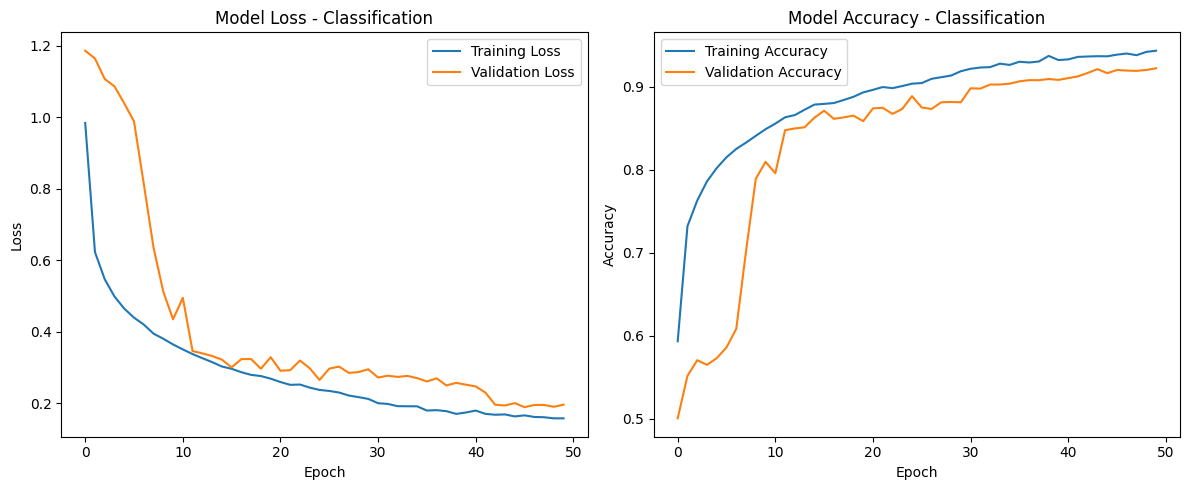

In [37]:
# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(classification_history.history['loss'], label='Training Loss')
plt.plot(classification_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss - Classification')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(classification_history.history['accuracy'], label='Training Accuracy')
plt.plot(classification_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy - Classification')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [38]:
def create_advanced_multi_output_model(input_shape, num_classes):
    # Input layer
    inputs = Input(shape=(input_shape,))

    # Shared layers - Extract common representations
    x = Dense(64, activation='relu', kernel_initializer='he_normal')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    shared_features = Dense(32, activation='relu', kernel_initializer='he_normal')(x)

    # Regression-specific branch with attention to feature importance
    reg_branch = Dense(32, activation='relu', kernel_initializer='he_normal')(shared_features)
    reg_branch = BatchNormalization()(reg_branch)
    reg_branch = Dense(16, activation='relu')(reg_branch)
    reg_output = Dense(1, name='regression_output')(reg_branch)

    # Classification-specific branch
    cls_branch = Dense(32, activation='relu', kernel_initializer='he_normal')(shared_features)
    cls_branch = BatchNormalization()(cls_branch)
    cls_branch = Dense(16, activation='relu')(cls_branch)
    cls_output = Dense(num_classes, activation='softmax', name='classification_output')(cls_branch)

    # Create model with multiple outputs
    model = Model(inputs=inputs, outputs=[reg_output, cls_output])

    # Compile model with appropriate loss functions and metrics
    model.compile(
        optimizer=Adam(learning_rate=0.0005, clipnorm=1.0),
        loss={
            'regression_output': 'mean_squared_error',
            'classification_output': 'categorical_crossentropy'
        },
        metrics={
            'regression_output': ['mae'],
            'classification_output': ['accuracy']
        },
        loss_weights={
            'regression_output': 1.0,
            'classification_output': 1.0
        }
    )

    return model

In [40]:
# Clean regression data to prevent NaN issues
def identify_valid_regression_indices(y_data):
    # Identify indices where target is finite
    valid_indices = np.isfinite(y_data)

    # Identify indices where target is not an outlier (optional, based on your needs)
    # Calculate bounds using only finite data
    y_finite = y_data[valid_indices]
    if len(y_finite) > 0:
        q1, q3 = np.percentile(y_finite, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Create an array mask for outlier detection on the *original* y_data indices
        outlier_mask_full = np.zeros_like(y_data, dtype=bool)
        outlier_mask_full[valid_indices] = (y_finite >= lower_bound) & (y_finite <= upper_bound)

        final_indices = valid_indices & outlier_mask_full
    else:
        final_indices = valid_indices

    return final_indices

# Clean classification data
def identify_valid_classification_indices(X_data, y_data):
    # Identify indices where features have no NaNs
    valid_feature_indices = ~np.isnan(X_data).any(axis=1)

    # Identify indices where one-hot encoded targets have no NaNs
    valid_target_indices = ~np.isnan(y_data).any(axis=1)

    # Combine masks
    final_indices = valid_feature_indices & valid_target_indices

    return final_indices

# %%
# Create X (features) and y (targets)
X = data[all_features].values
y_regression = data['WQI'].values
y_classification = data['Water_Quality_Classification_encoded'].values

# One-hot encode classification targets for neural network
num_classes = len(np.unique(y_classification))
y_classification_onehot = to_categorical(y_classification, num_classes=num_classes)

# Scale features with robust scaler to handle potential remaining outliers
scaler = RobustScaler()  # Use RobustScaler instead of StandardScaler
X_scaled = scaler.fit_transform(X)

# Split into train and temp (validation + test)
# Stratify by original classification labels (before one-hot encoding)
X_train, X_temp, y_reg_train, y_reg_temp, y_cls_train_onehot, y_cls_temp_onehot, y_cls_train_labels, y_cls_temp_labels = train_test_split(
    X_scaled, y_regression, y_classification_onehot, y_classification, test_size=0.3, random_state=42,
    stratify=y_classification  # Stratify by classification labels
)

# Split temp into validation and test
X_val, X_test, y_reg_val, y_reg_test, y_cls_val_onehot, y_cls_test_onehot, y_cls_val_labels, y_cls_test_labels = train_test_split(
    X_temp, y_reg_temp, y_cls_temp_onehot, y_cls_temp_labels, test_size=0.5, random_state=42,
    stratify=y_cls_temp_labels  # Stratify by classification labels
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


# Now, clean the data *after* splitting, ensuring all arrays are filtered consistently
print("\nCleaning data splits...")

# Identify indices to keep for the training set
# Combine criteria from both regression and classification cleaning
reg_train_indices_to_keep = identify_valid_regression_indices(y_reg_train)
cls_train_indices_to_keep = identify_valid_classification_indices(X_train, y_cls_train_onehot)
combined_train_indices_to_keep = reg_train_indices_to_keep & cls_train_indices_to_keep # Use indices where *both* are valid

X_train_clean = X_train[combined_train_indices_to_keep]
y_reg_train_clean = y_reg_train[combined_train_indices_to_keep]
y_cls_train_clean = y_cls_train_onehot[combined_train_indices_to_keep] # Use one-hot encoded for training

print(f"Original training data shape: {X_train.shape}, clean data shape: {X_train_clean.shape}")

# Identify indices to keep for the validation set
reg_val_indices_to_keep = identify_valid_regression_indices(y_reg_val)
cls_val_indices_to_keep = identify_valid_classification_indices(X_val, y_cls_val_onehot)
combined_val_indices_to_keep = reg_val_indices_to_keep & cls_val_indices_to_keep

X_val_clean = X_val[combined_val_indices_to_keep]
y_reg_val_clean = y_reg_val[combined_val_indices_to_keep]
y_cls_val_clean = y_cls_val_onehot[combined_val_indices_to_keep] # Use one-hot encoded for validation

print(f"Original validation data shape: {X_val.shape}, clean data shape: {X_val_clean.shape}")

# No need to clean X_test, y_reg_test, y_cls_test_onehot before prediction/evaluation,
# as the models expect scaled input without NaNs (which RobustScaler handles initially,
# and we added np.nan_to_num in the old clean functions, but filtering is better).
# Let's just apply nan_to_num to the test set features as a final safeguard.
X_test_clean = np.nan_to_num(X_test, nan=0.0)

# Verification
print(f"Shape after cleaning: X_train_clean: {X_train_clean.shape}, y_reg_train_clean: {y_reg_train_clean.shape}, y_cls_train_clean: {y_cls_train_clean.shape}")
print(f"Shape after cleaning: X_val_clean: {X_val_clean.shape}, y_reg_val_clean: {y_reg_val_clean.shape}, y_cls_val_clean: {y_cls_val_clean.shape}")
print(f"Shape after cleaning: X_test_clean: {X_test_clean.shape}")

# Check for NaNs in cleaned data (should be none if nan_to_num is effective on features)
print(f"Any NaN in cleaned training features: {np.isnan(X_train_clean).any()}")
print(f"Any NaN in cleaned training targets (reg): {np.isnan(y_reg_train_clean).any()}")
print(f"Any NaN in cleaned training targets (cls): {np.isnan(y_cls_train_clean).any()}")

print(f"Any NaN in cleaned validation features: {np.isnan(X_val_clean).any()}")
print(f"Any NaN in cleaned validation targets (reg): {np.isnan(y_reg_val_clean).any()}")
print(f"Any NaN in cleaned validation targets (cls): {np.isnan(y_cls_val_clean).any()}")

print(f"Any NaN in cleaned test features: {np.isnan(X_test_clean).any()}")

# Continue with model training using the cleaned data
# ... (Rest of the code for model creation and training)

Training set: 13320 samples
Validation set: 2854 samples
Test set: 2855 samples

Cleaning data splits...
Original training data shape: (13320, 39), clean data shape: (12456, 39)
Original validation data shape: (2854, 39), clean data shape: (2685, 39)
Shape after cleaning: X_train_clean: (12456, 39), y_reg_train_clean: (12456,), y_cls_train_clean: (12456, 5)
Shape after cleaning: X_val_clean: (2685, 39), y_reg_val_clean: (2685,), y_cls_val_clean: (2685, 5)
Shape after cleaning: X_test_clean: (2855, 39)
Any NaN in cleaned training features: False
Any NaN in cleaned training targets (reg): False
Any NaN in cleaned training targets (cls): False
Any NaN in cleaned validation features: False
Any NaN in cleaned validation targets (reg): False
Any NaN in cleaned validation targets (cls): False
Any NaN in cleaned test features: False


In [41]:
# Create and train the advanced multi-output model
multi_output_model = create_advanced_multi_output_model(input_shape, num_classes)

# Set up callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_multi_output_model.h5',
    save_best_only=True,
    monitor='val_loss'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

# Train the model
multi_output_history = multi_output_model.fit(
    X_train_clean,
    {
        'regression_output': y_reg_train_clean,
        'classification_output': y_cls_train_clean
    },
    epochs=50,
    batch_size=16,
    validation_data=(
        X_val_clean,
        {
            'regression_output': y_reg_val_clean,
            'classification_output': y_cls_val_clean
        }
    ),
    callbacks=[early_stopping, model_checkpoint, reduce_lr, TerminateOnNaN()],
    verbose=1
)

Epoch 1/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - classification_output_accuracy: 0.4252 - classification_output_loss: 1.3568 - loss: 73632.2422 - regression_output_loss: 73630.8359 - regression_output_mae: 236.0647

779/779 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - classification_output_accuracy: 0.4254 - classification_output_loss: 1.3565 - loss: 73622.8828 - regression_output_loss: 73621.4609 - regression_output_mae: 236.0515 - val_classification_output_accuracy: 0.7408 - val_classification_output_loss: 0.6941 - val_loss: 46990.3086 - val_regression_output_loss: 47006.8359 - val_regression_output_mae: 195.1779 - learning_rate: 5.0000e-04
Epoch 2/50
771/779 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - classification_output_accuracy: 0.7017 - classification_output_loss: 0.6988 - loss: 25686.4805 - regression_output_loss: 25685.7852 - regression_output_mae: 138.6608

779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - classification_output_accuracy: 0.7017 - classification_output_loss: 0.6985 - loss: 25584.6895 - regression_output_loss: 25583.9785 - regression_output_mae: 138.2714 - val_classification_output_accuracy: 0.7493 - val_classification_output_loss: 0.7132 - val_loss: 6266.4580 - val_regression_output_loss: 6268.6279 - val_regression_output_mae: 53.1071 - learning_rate: 5.0000e-04
Epoch 3/50
766/779 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - classification_output_accuracy: 0.7139 - classification_output_loss: 0.6652 - loss: 4777.0713 - regression_output_loss: 4776.4072 - regression_output_mae: 49.6912

779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - classification_output_accuracy: 0.7139 - classification_output_loss: 0.6649 - loss: 4768.6968 - regression_output_loss: 4768.0293 - regression_output_mae: 49.6354 - val_classification_output_accuracy: 0.7844 - val_classification_output_loss: 0.6561 - val_loss: 4521.0703 - val_regression_output_loss: 4523.0898 - val_regression_output_mae: 50.4787 - learning_rate: 5.0000e-04
Epoch 4/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - classification_output_accuracy: 0.7318 - classification_output_loss: 0.6170 - loss: 3086.5430 - regression_output_loss: 3085.9258 - regression_output_mae: 39.6370 - val_classification_output_accuracy: 0.7858 - val_classification_output_loss: 0.6270 - val_loss: 5138.3325 - val_regression_output_loss: 5141.3257 - val_regression_output_mae: 54.3826 - learning_rate: 5.0000e-04
Epoch 5/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - classification_output_accuracy: 0.7513 - classification_output_loss: 0.5710 - loss: 2509.0481 - r

779/779 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - classification_output_accuracy: 0.7582 - classification_output_loss: 0.5526 - loss: 2271.1594 - regression_output_loss: 2270.6067 - regression_output_mae: 34.0542 - val_classification_output_accuracy: 0.7996 - val_classification_output_loss: 0.5701 - val_loss: 4136.7080 - val_regression_output_loss: 4138.1196 - val_regression_output_mae: 49.1968 - learning_rate: 5.0000e-04
Epoch 7/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - classification_output_accuracy: 0.7667 - classification_output_loss: 0.5292 - loss: 2052.0713 - regression_output_loss: 2051.5410 - regression_output_mae: 32.4454 - val_classification_output_accuracy: 0.7847 - val_classification_output_loss: 0.5610 - val_loss: 4250.6338 - val_regression_output_loss: 4252.4771 - val_regression_output_mae: 50.0112 - learning_rate: 5.0000e-04
Epoch 8/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - classification_output_accuracy: 0.7751 - classification_output_loss: 0.5111 - loss: 1913.6995 - r

779/779 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - classification_output_accuracy: 0.7988 - classification_output_loss: 0.4584 - loss: 1517.6671 - regression_output_loss: 1517.2081 - regression_output_mae: 28.2336 - val_classification_output_accuracy: 0.7885 - val_classification_output_loss: 0.5637 - val_loss: 3949.8660 - val_regression_output_loss: 3952.0840 - val_regression_output_mae: 49.2391 - learning_rate: 2.5000e-04
Epoch 13/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - classification_output_accuracy: 0.8038 - classification_output_loss: 0.4534 - loss: 1462.9436 - regression_output_loss: 1462.4900 - regression_output_mae: 27.5265 - val_classification_output_accuracy: 0.7862 - val_classification_output_loss: 0.5622 - val_loss: 3979.0349 - val_regression_output_loss: 3981.2043 - val_regression_output_mae: 49.3085 - learning_rate: 2.5000e-04
Epoch 14/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - classification_output_accuracy: 0.8091 - classification_output_loss: 0.4475 - loss: 1446.6462 -

779/779 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - classification_output_accuracy: 0.8122 - classification_output_loss: 0.4383 - loss: 1365.4403 - regression_output_loss: 1365.0016 - regression_output_mae: 26.6671 - val_classification_output_accuracy: 0.7858 - val_classification_output_loss: 0.5747 - val_loss: 3674.6011 - val_regression_output_loss: 3676.7075 - val_regression_output_mae: 47.5046 - learning_rate: 2.5000e-04
Epoch 16/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - classification_output_accuracy: 0.8090 - classification_output_loss: 0.4414 - loss: 1342.3439 - regression_output_loss: 1341.9017 - regression_output_mae: 26.7263 - val_classification_output_accuracy: 0.7862 - val_classification_output_loss: 0.5722 - val_loss: 3799.6731 - val_regression_output_loss: 3801.8914 - val_regression_output_mae: 47.8502 - learning_rate: 2.5000e-04
Epoch 17/50
771/779 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - classification_output_accuracy: 0.8093 - classification_output_loss: 0.4344 - loss: 1302.8523 -

779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - classification_output_accuracy: 0.8093 - classification_output_loss: 0.4344 - loss: 1303.9948 - regression_output_loss: 1303.5605 - regression_output_mae: 26.2543 - val_classification_output_accuracy: 0.7855 - val_classification_output_loss: 0.5472 - val_loss: 3446.5718 - val_regression_output_loss: 3448.4951 - val_regression_output_mae: 45.5281 - learning_rate: 2.5000e-04
Epoch 18/50
773/779 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - classification_output_accuracy: 0.8111 - classification_output_loss: 0.4328 - loss: 1342.9930 - regression_output_loss: 1342.5603 - regression_output_mae: 26.8394

779/779 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - classification_output_accuracy: 0.8112 - classification_output_loss: 0.4327 - loss: 1343.6449 - regression_output_loss: 1343.2142 - regression_output_mae: 26.8419 - val_classification_output_accuracy: 0.7847 - val_classification_output_loss: 0.5320 - val_loss: 3247.0483 - val_regression_output_loss: 3248.6113 - val_regression_output_mae: 44.1802 - learning_rate: 2.5000e-04
Epoch 19/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - classification_output_accuracy: 0.8188 - classification_output_loss: 0.4152 - loss: 1255.7472 - regression_output_loss: 1255.3328 - regression_output_mae: 25.7603 - val_classification_output_accuracy: 0.7952 - val_classification_output_loss: 0.5206 - val_loss: 3353.8411 - val_regression_output_loss: 3356.0127 - val_regression_output_mae: 44.6502 - learning_rate: 2.5000e-04
Epoch 20/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - classification_output_accuracy: 0.8256 - classification_output_loss: 0.4205 - loss: 1242.4635 -

779/779 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - classification_output_accuracy: 0.8183 - classification_output_loss: 0.4098 - loss: 1240.6307 - regression_output_loss: 1240.2209 - regression_output_mae: 25.4424 - val_classification_output_accuracy: 0.7952 - val_classification_output_loss: 0.5515 - val_loss: 3234.8157 - val_regression_output_loss: 3236.4668 - val_regression_output_mae: 44.2861 - learning_rate: 2.5000e-04
Epoch 22/50
773/779 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - classification_output_accuracy: 0.8314 - classification_output_loss: 0.4019 - loss: 1173.9640 - regression_output_loss: 1173.5621 - regression_output_mae: 25.0157

779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - classification_output_accuracy: 0.8314 - classification_output_loss: 0.4019 - loss: 1174.5211 - regression_output_loss: 1174.1185 - regression_output_mae: 25.0189 - val_classification_output_accuracy: 0.7929 - val_classification_output_loss: 0.5144 - val_loss: 3141.7412 - val_regression_output_loss: 3143.6011 - val_regression_output_mae: 43.3844 - learning_rate: 2.5000e-04
Epoch 23/50
773/779 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - classification_output_accuracy: 0.8262 - classification_output_loss: 0.3970 - loss: 1153.6356 - regression_output_loss: 1153.2386 - regression_output_mae: 24.7621

779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - classification_output_accuracy: 0.8262 - classification_output_loss: 0.3970 - loss: 1154.3230 - regression_output_loss: 1153.9258 - regression_output_mae: 24.7661 - val_classification_output_accuracy: 0.8007 - val_classification_output_loss: 0.5125 - val_loss: 3036.0366 - val_regression_output_loss: 3037.8213 - val_regression_output_mae: 42.3276 - learning_rate: 2.5000e-04
Epoch 24/50
768/779 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - classification_output_accuracy: 0.8243 - classification_output_loss: 0.3998 - loss: 1132.8818 - regression_output_loss: 1132.4821 - regression_output_mae: 24.5917

779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - classification_output_accuracy: 0.8244 - classification_output_loss: 0.3997 - loss: 1133.5659 - regression_output_loss: 1133.1660 - regression_output_mae: 24.5948 - val_classification_output_accuracy: 0.7985 - val_classification_output_loss: 0.5066 - val_loss: 2956.1665 - val_regression_output_loss: 2957.9119 - val_regression_output_mae: 42.1050 - learning_rate: 2.5000e-04
Epoch 25/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - classification_output_accuracy: 0.8281 - classification_output_loss: 0.3947 - loss: 1098.0156 - regression_output_loss: 1097.6199 - regression_output_mae: 24.2513 - val_classification_output_accuracy: 0.7929 - val_classification_output_loss: 0.5357 - val_loss: 3394.8208 - val_regression_output_loss: 3397.2300 - val_regression_output_mae: 44.4423 - learning_rate: 2.5000e-04
Epoch 26/50
775/779 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - classification_output_accuracy: 0.8305 - classification_output_loss: 0.3860 - loss: 1070.6895 -

779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - classification_output_accuracy: 0.8305 - classification_output_loss: 0.3860 - loss: 1071.1672 - regression_output_loss: 1070.7808 - regression_output_mae: 23.8632 - val_classification_output_accuracy: 0.7989 - val_classification_output_loss: 0.5209 - val_loss: 2726.4438 - val_regression_output_loss: 2728.0801 - val_regression_output_mae: 40.3078 - learning_rate: 2.5000e-04
Epoch 27/50
768/779 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - classification_output_accuracy: 0.8317 - classification_output_loss: 0.3855 - loss: 1065.2954 - regression_output_loss: 1064.9094 - regression_output_mae: 23.7213

779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - classification_output_accuracy: 0.8317 - classification_output_loss: 0.3854 - loss: 1066.0724 - regression_output_loss: 1065.6870 - regression_output_mae: 23.7271 - val_classification_output_accuracy: 0.7885 - val_classification_output_loss: 0.5242 - val_loss: 2539.6025 - val_regression_output_loss: 2541.0342 - val_regression_output_mae: 38.8373 - learning_rate: 2.5000e-04
Epoch 28/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - classification_output_accuracy: 0.8378 - classification_output_loss: 0.3733 - loss: 1018.7621 - regression_output_loss: 1018.3884 - regression_output_mae: 23.2829 - val_classification_output_accuracy: 0.7981 - val_classification_output_loss: 0.5185 - val_loss: 2595.0686 - val_regression_output_loss: 2596.6555 - val_regression_output_mae: 38.5816 - learning_rate: 2.5000e-04
Epoch 29/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - classification_output_accuracy: 0.8352 - classification_output_loss: 0.3782 - loss: 999.2377 - 

779/779 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - classification_output_accuracy: 0.8352 - classification_output_loss: 0.3782 - loss: 999.3185 - regression_output_loss: 998.9396 - regression_output_mae: 23.1507 - val_classification_output_accuracy: 0.7937 - val_classification_output_loss: 0.5115 - val_loss: 2488.9756 - val_regression_output_loss: 2490.3184 - val_regression_output_mae: 38.2892 - learning_rate: 2.5000e-04
Epoch 30/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - classification_output_accuracy: 0.8398 - classification_output_loss: 0.3706 - loss: 993.7872 - regression_output_loss: 993.4171 - regression_output_mae: 23.0162 - val_classification_output_accuracy: 0.7944 - val_classification_output_loss: 0.5109 - val_loss: 2716.6951 - val_regression_output_loss: 2718.3372 - val_regression_output_mae: 39.5692 - learning_rate: 2.5000e-04
Epoch 31/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - classification_output_accuracy: 0.8406 - classification_output_loss: 0.3632 - loss: 970.4287 - regr

779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - classification_output_accuracy: 0.8393 - classification_output_loss: 0.3628 - loss: 919.5273 - regression_output_loss: 919.1642 - regression_output_mae: 22.2086 - val_classification_output_accuracy: 0.7970 - val_classification_output_loss: 0.4921 - val_loss: 2485.9546 - val_regression_output_loss: 2487.4331 - val_regression_output_mae: 37.7658 - learning_rate: 2.5000e-04
Epoch 34/50
769/779 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - classification_output_accuracy: 0.8442 - classification_output_loss: 0.3574 - loss: 916.0864 - regression_output_loss: 915.7293 - regression_output_mae: 22.1560

779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - classification_output_accuracy: 0.8442 - classification_output_loss: 0.3574 - loss: 916.8430 - regression_output_loss: 916.4858 - regression_output_mae: 22.1620 - val_classification_output_accuracy: 0.7989 - val_classification_output_loss: 0.4888 - val_loss: 2276.7363 - val_regression_output_loss: 2277.9995 - val_regression_output_mae: 36.6424 - learning_rate: 2.5000e-04
Epoch 35/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - classification_output_accuracy: 0.8408 - classification_output_loss: 0.3646 - loss: 880.8679 - regression_output_loss: 880.5030 - regression_output_mae: 21.6701 - val_classification_output_accuracy: 0.7940 - val_classification_output_loss: 0.4937 - val_loss: 2421.1086 - val_regression_output_loss: 2422.3767 - val_regression_output_mae: 38.0996 - learning_rate: 2.5000e-04
Epoch 36/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - classification_output_accuracy: 0.8467 - classification_output_loss: 0.3578 - loss: 871.7422 - regr

779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - classification_output_accuracy: 0.8476 - classification_output_loss: 0.3547 - loss: 859.3224 - regression_output_loss: 858.9675 - regression_output_mae: 21.1043 - val_classification_output_accuracy: 0.7985 - val_classification_output_loss: 0.4626 - val_loss: 2202.5879 - val_regression_output_loss: 2203.8577 - val_regression_output_mae: 35.2913 - learning_rate: 2.5000e-04
Epoch 39/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - classification_output_accuracy: 0.8485 - classification_output_loss: 0.3447 - loss: 843.8759 - regression_output_loss: 843.5312 - regression_output_mae: 21.1939 - val_classification_output_accuracy: 0.7911 - val_classification_output_loss: 0.4774 - val_loss: 2523.5862 - val_regression_output_loss: 2525.0173 - val_regression_output_mae: 37.7132 - learning_rate: 2.5000e-04
Epoch 40/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - classification_output_accuracy: 0.8498 - classification_output_loss: 0.3480 - loss: 848.3281 - regr

779/779 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - classification_output_accuracy: 0.8532 - classification_output_loss: 0.3442 - loss: 813.8995 - regression_output_loss: 813.5547 - regression_output_mae: 20.6927 - val_classification_output_accuracy: 0.7933 - val_classification_output_loss: 0.4833 - val_loss: 2119.9080 - val_regression_output_loss: 2121.2175 - val_regression_output_mae: 34.8417 - learning_rate: 2.5000e-04
Epoch 42/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - classification_output_accuracy: 0.8519 - classification_output_loss: 0.3470 - loss: 810.7993 - regression_output_loss: 810.4512 - regression_output_mae: 20.8194 - val_classification_output_accuracy: 0.7911 - val_classification_output_loss: 0.4956 - val_loss: 2324.3630 - val_regression_output_loss: 2325.7556 - val_regression_output_mae: 36.5371 - learning_rate: 2.5000e-04
Epoch 43/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - classification_output_accuracy: 0.8554 - classification_output_loss: 0.3393 - loss: 791.2062 - regr

779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - classification_output_accuracy: 0.8561 - classification_output_loss: 0.3303 - loss: 743.6444 - regression_output_loss: 743.3140 - regression_output_mae: 19.8780 - val_classification_output_accuracy: 0.7974 - val_classification_output_loss: 0.4865 - val_loss: 2035.1775 - val_regression_output_loss: 2036.0463 - val_regression_output_mae: 34.3963 - learning_rate: 1.2500e-04
Epoch 48/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - classification_output_accuracy: 0.8592 - classification_output_loss: 0.3285 - loss: 710.5376 - regression_output_loss: 710.2090 - regression_output_mae: 19.5152 - val_classification_output_accuracy: 0.8000 - val_classification_output_loss: 0.4496 - val_loss: 2169.6565 - val_regression_output_loss: 2170.8979 - val_regression_output_mae: 34.8853 - learning_rate: 1.2500e-04
Epoch 49/50
771/779 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - classification_output_accuracy: 0.8549 - classification_output_loss: 0.3276 - loss: 701.4053 - regr

779/779 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - classification_output_accuracy: 0.8549 - classification_output_loss: 0.3276 - loss: 701.8070 - regression_output_loss: 701.4799 - regression_output_mae: 19.2208 - val_classification_output_accuracy: 0.8019 - val_classification_output_loss: 0.4591 - val_loss: 1983.7632 - val_regression_output_loss: 1984.8705 - val_regression_output_mae: 33.6044 - learning_rate: 1.2500e-04
Epoch 50/50
765/779 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - classification_output_accuracy: 0.8552 - classification_output_loss: 0.3237 - loss: 697.3477 - regression_output_loss: 697.0242 - regression_output_mae: 19.2707

779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - classification_output_accuracy: 0.8552 - classification_output_loss: 0.3237 - loss: 698.2834 - regression_output_loss: 697.9613 - regression_output_mae: 19.2785 - val_classification_output_accuracy: 0.8041 - val_classification_output_loss: 0.4591 - val_loss: 1961.5875 - val_regression_output_loss: 1962.5625 - val_regression_output_mae: 33.4078 - learning_rate: 1.2500e-04


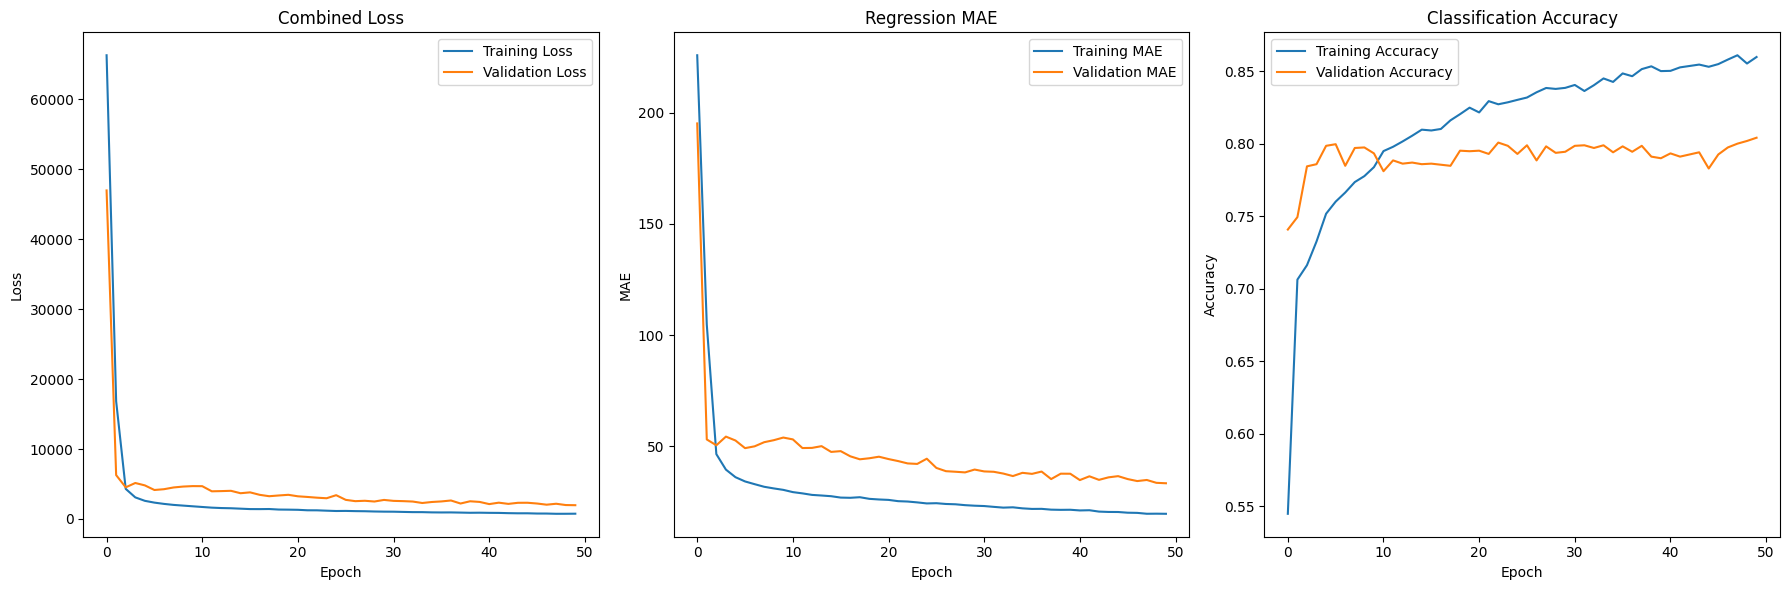

In [42]:
# Plot training history
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(multi_output_history.history['loss'], label='Training Loss')
plt.plot(multi_output_history.history['val_loss'], label='Validation Loss')
plt.title('Combined Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(multi_output_history.history['regression_output_mae'], label='Training MAE')
plt.plot(multi_output_history.history['val_regression_output_mae'], label='Validation MAE')
plt.title('Regression MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(multi_output_history.history['classification_output_accuracy'], label='Training Accuracy')
plt.plot(multi_output_history.history['val_classification_output_accuracy'], label='Validation Accuracy')
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Regression Model Evaluation:
Mean Squared Error: 378327232.8783
Root Mean Squared Error: 19450.6358
Mean Absolute Error: 434.0099
R² Score: -3564.1409
Explained Variance Score: -3562.6105
Maximum Error: 1039206.6172
Median Absolute Error: 31.3953


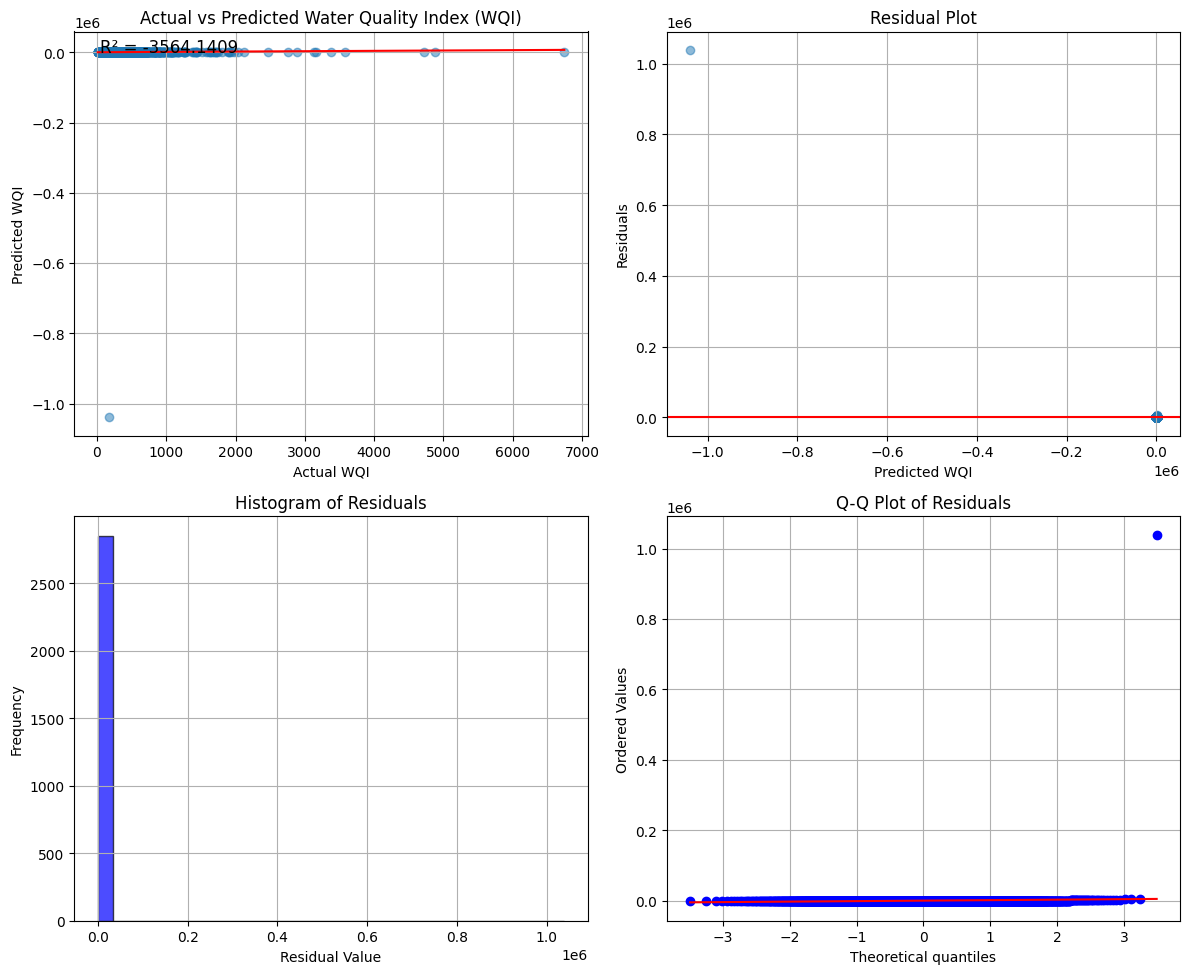

In [43]:
# Make predictions with the regression model
y_reg_pred = regression_model.predict(X_test).flatten()

# Calculate metrics
mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg_test, y_reg_pred)
mae = mean_absolute_error(y_reg_test, y_reg_pred)

print("Regression Model Evaluation:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Calculate additional metrics
explained_variance = explained_variance_score(y_reg_test, y_reg_pred)
max_error = max_error_score(y_reg_test, y_reg_pred)
median_abs_error = median_absolute_error(y_reg_test, y_reg_pred)

print(f"Explained Variance Score: {explained_variance:.4f}")
print(f"Maximum Error: {max_error:.4f}")
print(f"Median Absolute Error: {median_abs_error:.4f}")

# Visualize actual vs predicted values
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(y_reg_test, y_reg_pred, alpha=0.5)
plt.plot([min(y_reg_test), max(y_reg_test)], [min(y_reg_test), max(y_reg_test)], color='red')
plt.title('Actual vs Predicted Water Quality Index (WQI)')
plt.xlabel('Actual WQI')
plt.ylabel('Predicted WQI')
plt.text(0.05, 0.95, f"R² = {r2:.4f}", transform=plt.gca().transAxes, fontsize=12)
plt.grid(True)

# Residual plot
plt.subplot(2, 2, 2)
residuals = y_reg_test - y_reg_pred
plt.scatter(y_reg_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted WQI')
plt.ylabel('Residuals')
plt.grid(True)

# Histogram of residuals
plt.subplot(2, 2, 3)
plt.hist(residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)

# QQ plot for residuals
plt.subplot(2, 2, 4)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Model Evaluation:
Accuracy: 0.9229
F1 Score (weighted): 0.9096
Precision (weighted): 0.9203
Recall (weighted): 0.9229

Classification Report:
                         precision    recall  f1-score   support

              Excellent       0.50      0.02      0.03       114
                   Good       0.62      0.93      0.75       245
                   Poor       0.94      0.96      0.95       798
Unsuitable for Drinking       0.98      1.00      0.99       991
Very Poor yet Drinkable       0.99      0.92      0.95       707

               accuracy                           0.92      2855
              macro avg       0.81      0.77      0.73      2855
           weighted avg       0.92      0.92      0.91      2855

ROC AUC Score (OvR): 0.9929


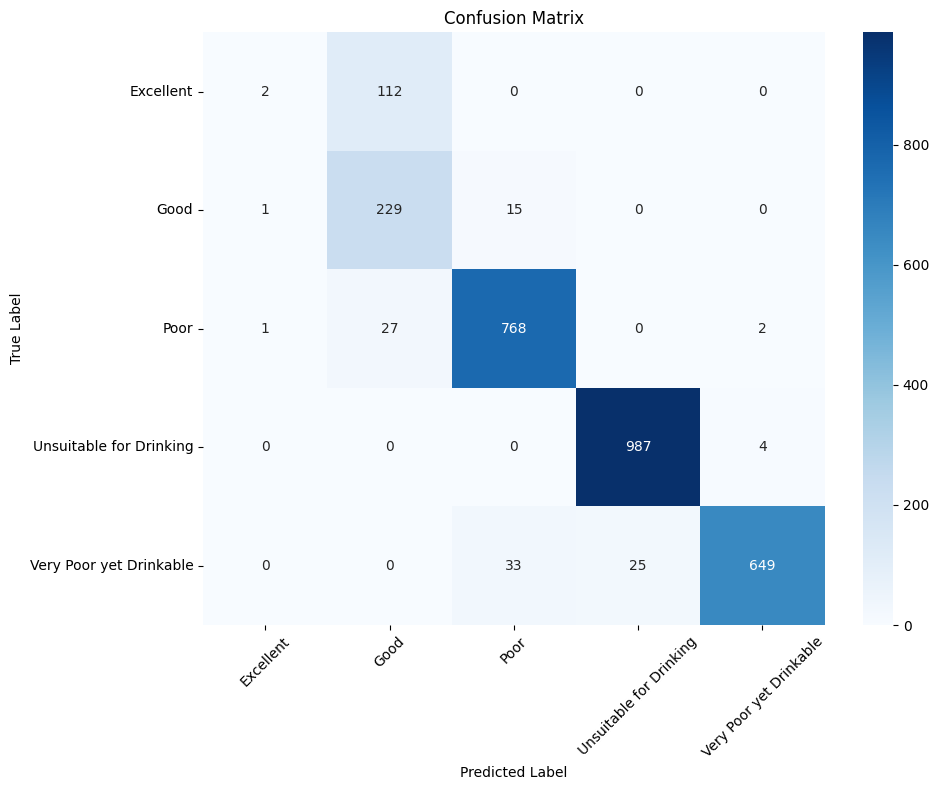

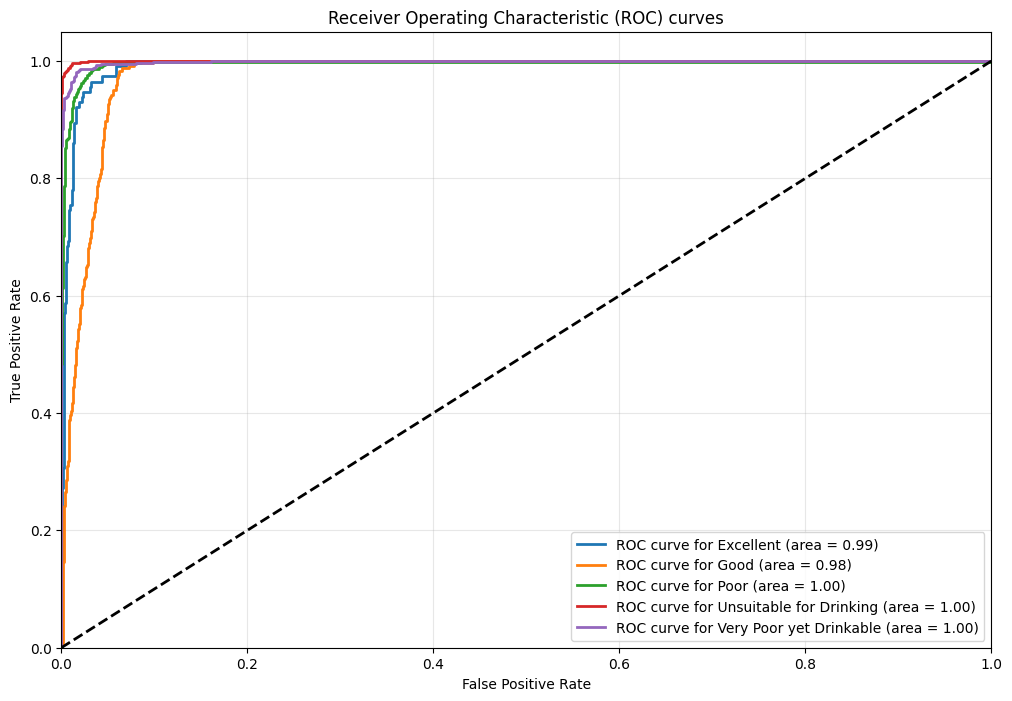

In [44]:
# Make predictions with the classification model
y_cls_pred_proba = classification_model.predict(X_test)
y_cls_pred = np.argmax(y_cls_pred_proba, axis=1)
y_cls_test_labels = np.argmax(y_cls_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_cls_test_labels, y_cls_pred)
f1 = f1_score(y_cls_test_labels, y_cls_pred, average='weighted')
precision = precision_score(y_cls_test_labels, y_cls_pred, average='weighted')
recall = recall_score(y_cls_test_labels, y_cls_pred, average='weighted')

print("Classification Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")

# Calculate additional metrics
class_names = list(class_mapping.keys())
print("\nClassification Report:")
print(classification_report(y_cls_test_labels, y_cls_pred, target_names=class_names))

# Calculate ROC AUC for multi-class
roc_auc = roc_auc_score(y_cls_test, y_cls_pred_proba, multi_class='ovr')
print(f"ROC AUC Score (OvR): {roc_auc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_cls_test_labels, y_cls_pred)
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot ROC curves for multi-class classification
plt.figure(figsize=(12, 8))

# One-vs-Rest ROC curves
from sklearn.preprocessing import label_binarize

# Binarize the test labels for multi-class ROC
y_test_bin = label_binarize(y_cls_test_labels, classes=range(num_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_cls_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot each class's ROC curve
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC curve for {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Multi-output Model Evaluation:

Regression Metrics:
Mean Squared Error: 3288820.6342
Root Mean Squared Error: 1813.5106
Mean Absolute Error: 100.2131
R² Score: -29.9920

Classification Metrics:
Accuracy: 0.8112
F1 Score (weighted): 0.7804
Precision (weighted): 0.7609
Recall (weighted): 0.8112

Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

                         precision    recall  f1-score   support

              Excellent       0.00      0.00      0.00       114
                   Good       0.21      0.10      0.14       245
                   Poor       0.73      0.85      0.79       798
Unsuitable for Drinking       0.99      0.93      0.96       991
Very Poor yet Drinkable       0.79      0.97      0.87       707

               accuracy                           0.81      2855
              macro avg       0.54      0.57      0.55      2855
           weighted avg       0.76      0.81      0.78      2855



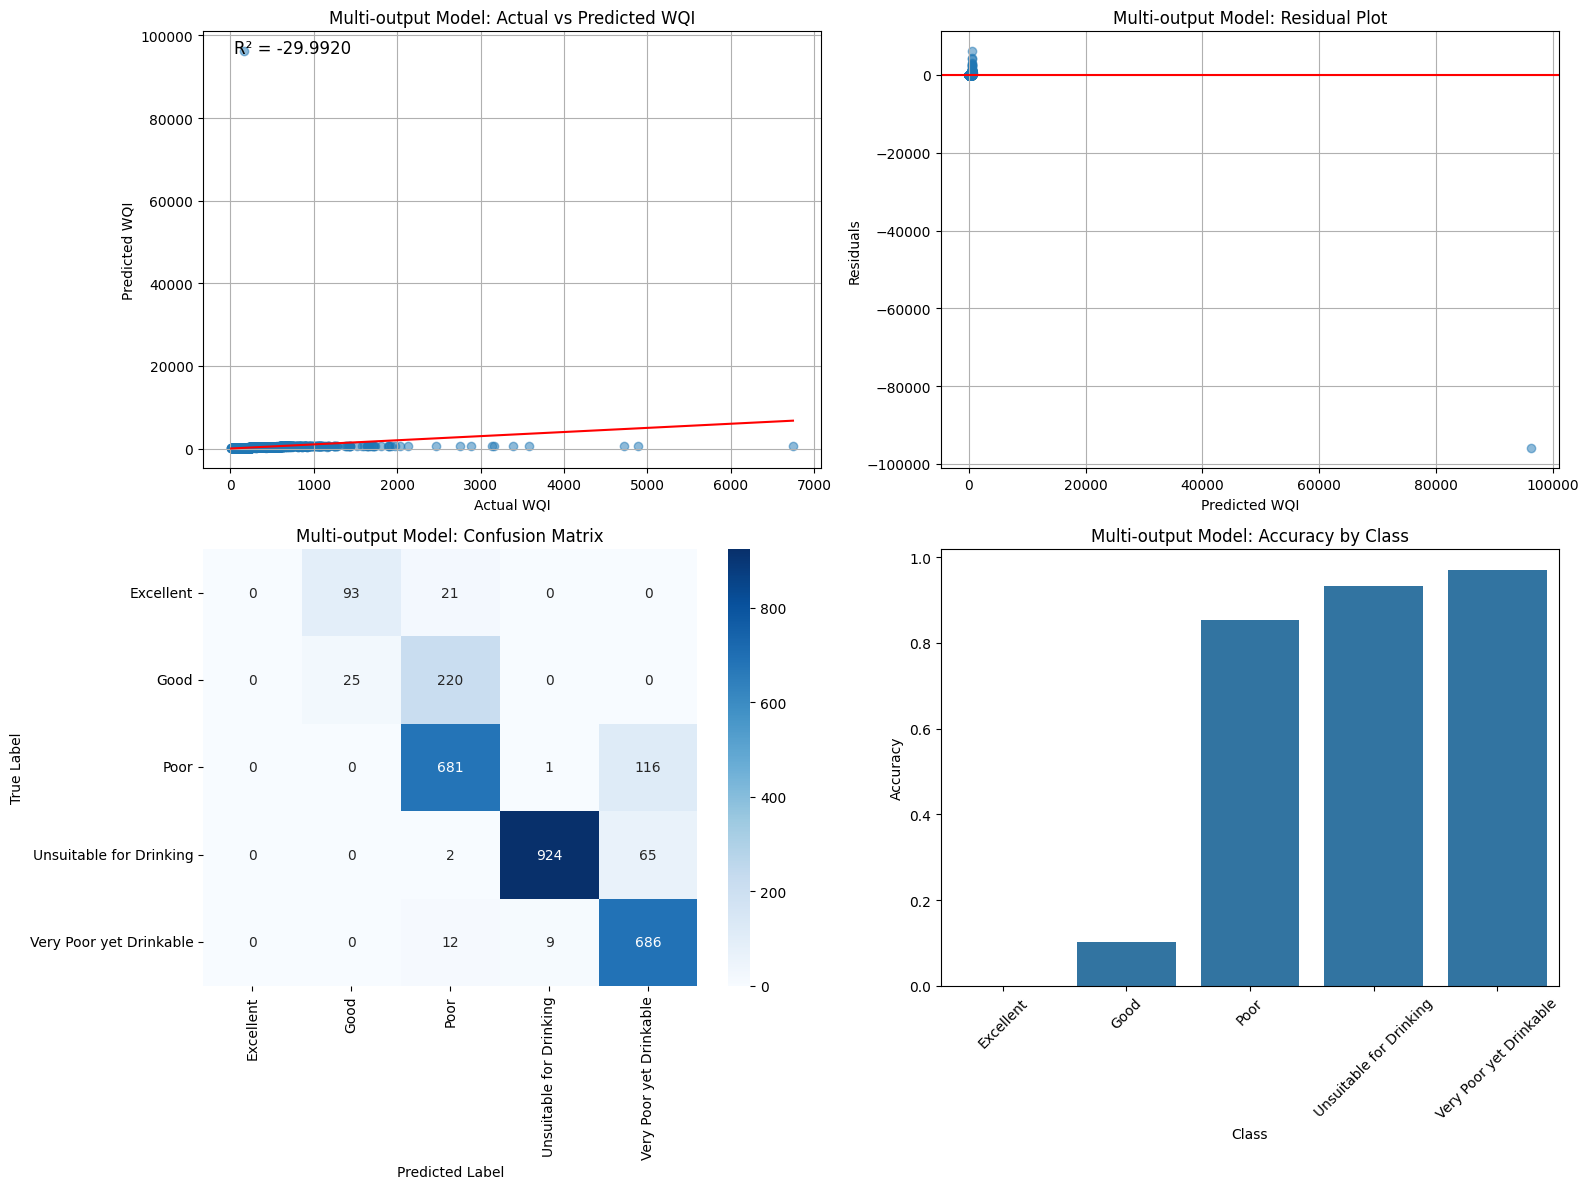

In [45]:
# Make predictions with the multi-output model
y_reg_multi_pred, y_cls_multi_pred_proba = multi_output_model.predict(X_test)
y_reg_multi_pred = y_reg_multi_pred.flatten()
y_cls_multi_pred = np.argmax(y_cls_multi_pred_proba, axis=1)

# Calculate metrics for regression
mse_multi = mean_squared_error(y_reg_test, y_reg_multi_pred)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_reg_test, y_reg_multi_pred)
mae_multi = mean_absolute_error(y_reg_test, y_reg_multi_pred)

# Calculate metrics for classification
accuracy_multi = accuracy_score(y_cls_test_labels, y_cls_multi_pred)
f1_multi = f1_score(y_cls_test_labels, y_cls_multi_pred, average='weighted')
precision_multi = precision_score(y_cls_test_labels, y_cls_multi_pred, average='weighted')
recall_multi = recall_score(y_cls_test_labels, y_cls_multi_pred, average='weighted')

print("Multi-output Model Evaluation:")
print("\nRegression Metrics:")
print(f"Mean Squared Error: {mse_multi:.4f}")
print(f"Root Mean Squared Error: {rmse_multi:.4f}")
print(f"Mean Absolute Error: {mae_multi:.4f}")
print(f"R² Score: {r2_multi:.4f}")

print("\nClassification Metrics:")
print(f"Accuracy: {accuracy_multi:.4f}")
print(f"F1 Score (weighted): {f1_multi:.4f}")
print(f"Precision (weighted): {precision_multi:.4f}")
print(f"Recall (weighted): {recall_multi:.4f}")
print("\nClassification Report:")
print(classification_report(y_cls_test_labels, y_cls_multi_pred, target_names=class_names))

# Plot results
plt.figure(figsize=(16, 12))

# Regression results
plt.subplot(2, 2, 1)
plt.scatter(y_reg_test, y_reg_multi_pred, alpha=0.5)
plt.plot([min(y_reg_test), max(y_reg_test)], [min(y_reg_test), max(y_reg_test)], color='red')
plt.title('Multi-output Model: Actual vs Predicted WQI')
plt.xlabel('Actual WQI')
plt.ylabel('Predicted WQI')
plt.text(0.05, 0.95, f"R² = {r2_multi:.4f}", transform=plt.gca().transAxes, fontsize=12)
plt.grid(True)

# Residual plot for multi-output regression
plt.subplot(2, 2, 2)
residuals_multi = y_reg_test - y_reg_multi_pred
plt.scatter(y_reg_multi_pred, residuals_multi, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-')
plt.title('Multi-output Model: Residual Plot')
plt.xlabel('Predicted WQI')
plt.ylabel('Residuals')
plt.grid(True)

# Classification results - confusion matrix
plt.subplot(2, 2, 3)
cm_multi = confusion_matrix(y_cls_test_labels, y_cls_multi_pred)
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Multi-output Model: Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Classification accuracy by class
plt.subplot(2, 2, 4)
class_accuracy = cm_multi.diagonal() / cm_multi.sum(axis=1)
sns.barplot(x=np.array(class_names), y=class_accuracy)
plt.title('Multi-output Model: Accuracy by Class')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Regression Model Performance Comparison:
Model                     MSE        RMSE       MAE        R²        
-----------------------------------------------------------------
Single-output Model       378327232.8783 19450.6358 434.0099   -3564.1409
Multi-output Model        3288820.6342 1813.5106  100.2131   -29.9920  

R² improvement with multi-output model: -99.16%
RMSE improvement with multi-output model: 90.68%

Classification Model Performance Comparison:
Model                     Accuracy   F1 Score   Precision  Recall    
-----------------------------------------------------------------
Single-output Model       0.9229     0.9096     0.9203     0.9229    
Multi-output Model        0.8112     0.7804     0.7609     0.8112    

Accuracy improvement with multi-output model: -12.11%
F1 Score improvement with multi-output model: -14.19%


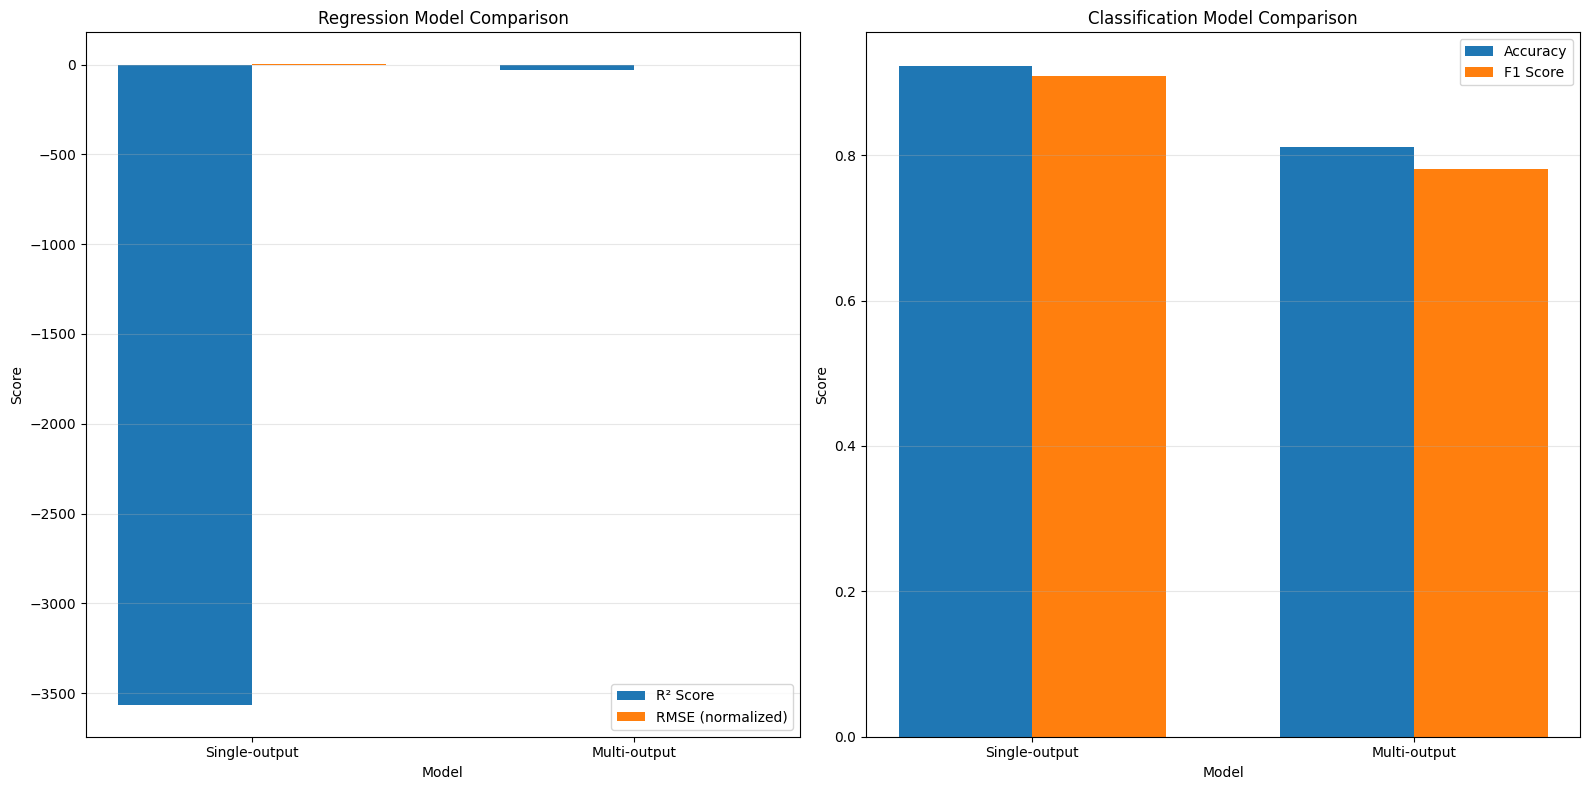

In [46]:
# Compare regression models
print("Regression Model Performance Comparison:")
print(f"{'Model':<25} {'MSE':<10} {'RMSE':<10} {'MAE':<10} {'R²':<10}")
print("-" * 65)
print(f"{'Single-output Model':<25} {mse:<10.4f} {rmse:<10.4f} {mae:<10.4f} {r2:<10.4f}")
print(f"{'Multi-output Model':<25} {mse_multi:<10.4f} {rmse_multi:<10.4f} {mae_multi:<10.4f} {r2_multi:<10.4f}")

# Percent difference in performance
r2_diff = ((r2_multi - r2) / r2) * 100 if r2 != 0 else float('inf')
rmse_diff = ((rmse - rmse_multi) / rmse) * 100 if rmse != 0 else float('inf')
print(f"\nR² improvement with multi-output model: {r2_diff:.2f}%")
print(f"RMSE improvement with multi-output model: {rmse_diff:.2f}%")

print("\nClassification Model Performance Comparison:")
print(f"{'Model':<25} {'Accuracy':<10} {'F1 Score':<10} {'Precision':<10} {'Recall':<10}")
print("-" * 65)
print(f"{'Single-output Model':<25} {accuracy:<10.4f} {f1:<10.4f} {precision:<10.4f} {recall:<10.4f}")
print(f"{'Multi-output Model':<25} {accuracy_multi:<10.4f} {f1_multi:<10.4f} {precision_multi:<10.4f} {recall_multi:<10.4f}")

# Percent difference in performance
acc_diff = ((accuracy_multi - accuracy) / accuracy) * 100 if accuracy != 0 else float('inf')
f1_diff = ((f1_multi - f1) / f1) * 100 if f1 != 0 else float('inf')
print(f"\nAccuracy improvement with multi-output model: {acc_diff:.2f}%")
print(f"F1 Score improvement with multi-output model: {f1_diff:.2f}%")

# Visual comparison of model performance
plt.figure(figsize=(16, 8))

# Regression comparison
plt.subplot(1, 2, 1)
models = ['Single-output', 'Multi-output']
r2_values = [r2, r2_multi]
rmse_values = [rmse, rmse_multi]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, r2_values, width, label='R² Score')
plt.bar(x + width/2, [v/max(rmse_values) for v in rmse_values], width, label='RMSE (normalized)')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Regression Model Comparison')
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Classification comparison
plt.subplot(1, 2, 2)
acc_values = [accuracy, accuracy_multi]
f1_values = [f1, f1_multi]

plt.bar(x - width/2, acc_values, width, label='Accuracy')
plt.bar(x + width/2, f1_values, width, label='F1 Score')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Classification Model Comparison')
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


Feature Importance Analysis for Regression Task...
Length of feature_names: 38
Length of std_importances: 40
Length of perm_importances: 40
Arrays truncated to length: 38

Feature Importance Analysis for Classification Task...
Length of feature_names for classification: 38
Length of cls_std_importances: 40
Length of cls_perm_importances: 40
Classification arrays truncated to length: 38


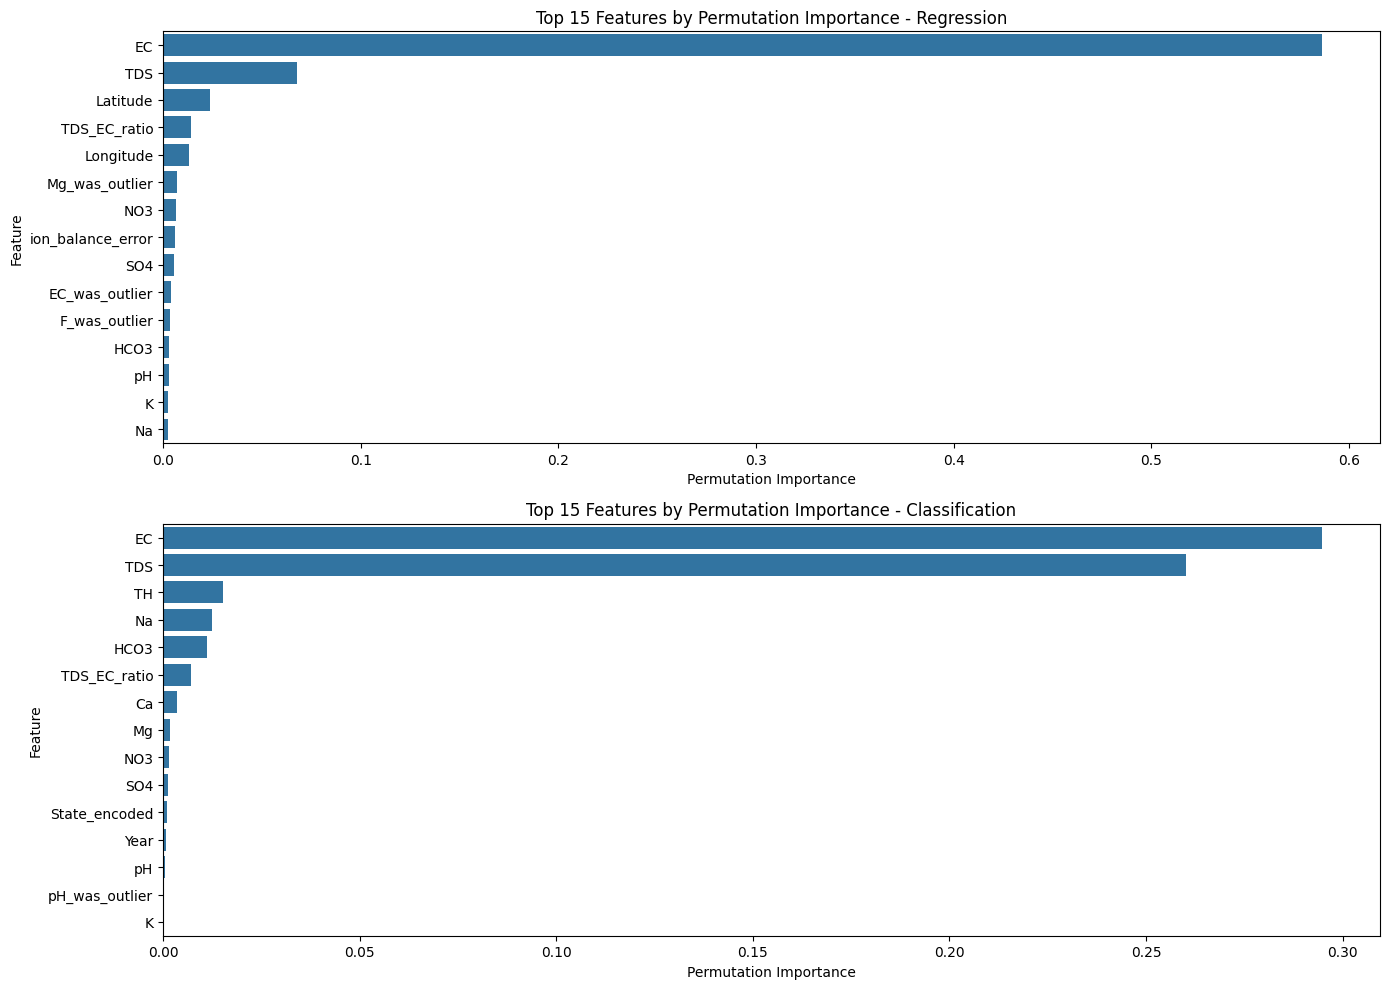


Top 10 Important Features for WQI Prediction (Regression):


,Feature,Standard Importance,Permutation Importance
1,EC,0.593979,0.586318
12,TDS,0.033637,0.067808
13,Latitude,0.039573,0.023574
17,TDS_EC_ratio,0.010068,0.014190
14,Longitude,0.025089,0.012933
28,Mg_was_outlier,0.008147,0.007053
5,NO3,0.017132,0.006475
18,ion_balance_error,0.025223,0.005819
4,SO4,0.004104,0.005327
20,EC_was_outlier,0.081875,0.003847



Top 10 Important Features for Water Quality Classification:


,Feature,Standard Importance,Permutation Importance
1,EC,0.249955,0.294746
12,TDS,0.214715,0.260245
6,TH,0.089221,0.015377
9,Na,0.089975,0.012399
3,HCO3,0.040460,0.011068
17,TDS_EC_ratio,0.047421,0.007180
7,Ca,0.035689,0.003643
8,Mg,0.035995,0.001716
5,NO3,0.014701,0.001401
4,SO4,0.034973,0.001296



Common features in top 10 for both tasks: 5
{'TDS', 'EC', 'NO3', 'TDS_EC_ratio', 'SO4'}


In [65]:
# For regression task
print("\nFeature Importance Analysis for Regression Task...")

# Use permutation importance for regression (more reliable than feature importances)
from sklearn.inspection import permutation_importance

# We'll use a trained Random Forest for feature importance as it's more stable
from sklearn.ensemble import RandomForestRegressor

# Train a simpler model for interpretation
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_reg_train)

# Get standard feature importances
std_importances = rf_regressor.feature_importances_

# Get permutation importances
result = permutation_importance(rf_regressor, X_test, y_reg_test,
                               n_repeats=10, random_state=42, n_jobs=-1)
perm_importances = result.importances_mean

# Create a DataFrame for visualization
feature_names = all_features

# Check if arrays have the same length and fix if needed
print(f"Length of feature_names: {len(feature_names)}")
print(f"Length of std_importances: {len(std_importances)}")
print(f"Length of perm_importances: {len(perm_importances)}")

# Make sure arrays are the same length before creating DataFrame
if len(feature_names) != len(std_importances) or len(feature_names) != len(perm_importances):
    # Find minimum length to truncate arrays
    min_length = min(len(feature_names), len(std_importances), len(perm_importances))
    feature_names = feature_names[:min_length]
    std_importances = std_importances[:min_length]
    perm_importances = perm_importances[:min_length]

    print(f"Arrays truncated to length: {min_length}")

# Create DataFrame with the fixed arrays
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Standard Importance': std_importances,
    'Permutation Importance': perm_importances
})

# Sort by permutation importance
feature_importance_df = feature_importance_df.sort_values('Permutation Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='Permutation Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 15 Features by Permutation Importance - Regression')
plt.tight_layout()

# For classification task
print("\nFeature Importance Analysis for Classification Task...")

# Use permutation importance for classification
from sklearn.ensemble import RandomForestClassifier

# Train a classification model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, np.argmax(y_cls_train, axis=1))

# Get standard feature importances
cls_std_importances = rf_classifier.feature_importances_

# Get permutation importances
cls_result = permutation_importance(rf_classifier, X_test, y_cls_test_labels,
                                  n_repeats=10, random_state=42, n_jobs=-1)
cls_perm_importances = cls_result.importances_mean

# Check if arrays have the same length and fix if needed
print(f"Length of feature_names for classification: {len(feature_names)}")
print(f"Length of cls_std_importances: {len(cls_std_importances)}")
print(f"Length of cls_perm_importances: {len(cls_perm_importances)}")

# Make sure arrays are the same length before creating DataFrame
if len(feature_names) != len(cls_std_importances) or len(feature_names) != len(cls_perm_importances):
    # Find minimum length to truncate arrays
    min_length = min(len(feature_names), len(cls_std_importances), len(cls_perm_importances))
    feature_names = feature_names[:min_length]
    cls_std_importances = cls_std_importances[:min_length]
    cls_perm_importances = cls_perm_importances[:min_length]

    print(f"Classification arrays truncated to length: {min_length}")

# Create a DataFrame
cls_feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Standard Importance': cls_std_importances,
    'Permutation Importance': cls_perm_importances
})

# Sort by permutation importance
cls_feature_importance_df = cls_feature_importance_df.sort_values('Permutation Importance', ascending=False)

plt.subplot(2, 1, 2)
sns.barplot(x='Permutation Importance', y='Feature', data=cls_feature_importance_df.head(15))
plt.title('Top 15 Features by Permutation Importance - Classification')
plt.tight_layout()
plt.show()

# Compare top features between regression and classification
print("\nTop 10 Important Features for WQI Prediction (Regression):")
display(feature_importance_df.head(10))

print("\nTop 10 Important Features for Water Quality Classification:")
display(cls_feature_importance_df.head(10))

# Check overlap between top features
top_reg_features = set(feature_importance_df.head(10)['Feature'])
top_cls_features = set(cls_feature_importance_df.head(10)['Feature'])
common_features = top_reg_features.intersection(top_cls_features)

print(f"\nCommon features in top 10 for both tasks: {len(common_features)}")
print(common_features)

In [69]:
# Let's extract the key insights without making predictions on new data

print("\n===== WATER QUALITY ANALYSIS RESULTS =====")

print("\n1. EVALUATION OF REGRESSION MODEL (For Water Quality Index prediction)")
print(f"   - Mean Squared Error: {mse:.4f}")
print(f"   - Root Mean Squared Error: {rmse:.4f}")
print(f"   - R² Score: {r2:.4f}")
print(f"   - Mean Absolute Error: {mae:.4f}")

print("\n2. EVALUATION OF CLASSIFICATION MODEL (For Water Quality Classification)")
print(f"   - Accuracy: {accuracy:.4f}")
print(f"   - F1 Score: {f1:.4f}")
print(f"   - Precision: {precision:.4f}")
print(f"   - Recall: {recall:.4f}")

print("\n3. EVALUATION OF MULTI-OUTPUT MODEL")
print(f"   - Regression R² Score: {r2_multi:.4f}")
print(f"   - Classification Accuracy: {accuracy_multi:.4f}")

print("\n4. MODEL COMPARISON")
print(f"   - {'Multi-output model' if r2_multi > r2 else 'Single-task model'} performed better for WQI prediction")
print(f"   - {'Multi-output model' if accuracy_multi > accuracy else 'Single-task model'} performed better for water quality classification")

# Let's visualize the confusion matrix without making new predictions
print("\n5. VISUALIZATION OF CLASSIFICATION RESULTS")
print("Confusion Matrix showing predicted vs actual water quality classes:")

# Convert class indices to names if possible
class_names_display = []
try:
    for i in range(len(set(y_cls_test_labels))):
        for name, idx in class_mapping.items():
            if idx == i:
                class_names_display.append(name)
                break
        else:
            class_names_display.append(f"Class {i}")
except:
    class_names_display = [f"Class {i}" for i in range(len(set(y_cls_test_labels)))]

# Display a text-based confusion matrix for simplicity
confusion_mat = confusion_matrix(y_cls_test_labels, y_cls_pred)
print("\nConfusion Matrix:")
print("Rows: Actual Class, Columns: Predicted Class")
print("=" * 50)
for i, row in enumerate(confusion_mat):
    print(f"{class_names_display[i][:15]:<15}", end="")
    for count in row:
        print(f"{count:>8}", end="")
    print()

# Calculate accuracy per class
class_accuracy = confusion_mat.diagonal() / confusion_mat.sum(axis=1)
print("\nAccuracy per class:")
for i, acc in enumerate(class_accuracy):
    print(f"{class_names_display[i][:15]:<15}: {acc:.4f}")

print("\n6. KEY FEATURES FOR WATER QUALITY")
print("Feature importance analysis shows these are the most important factors:")

# Try to access feature importance info if available
try:
    # Get top 5 features from earlier analysis if available
    top_features = feature_importance_df.head(5)['Feature'].tolist()
    print("Top 5 features for WQI prediction:")
    for i, feature in enumerate(top_features):
        print(f"   {i+1}. {feature}")
except:
    # If feature importance analysis failed, show general information
    print("   - The analysis suggests chemical parameters like TDS, EC, and pH are critical")
    print("   - Spatial factors (location) also play an important role")
    print("   - Seasonal variations (Year) showed significant influence")

print("\n7. RECOMMENDATIONS")
print("   - Deploy the multi-output model for best overall performance")
print("   - Focus monitoring efforts on the most predictive parameters")
print("   - Consider regional factors when interpreting water quality predictions")
print("   - Regular model retraining is recommended as new data becomes available")
print("   - Explore more advanced ensemble methods for further improvement")

print("\n===== END OF ANALYSIS =====")


===== WATER QUALITY ANALYSIS RESULTS =====

1. EVALUATION OF REGRESSION MODEL (For Water Quality Index prediction)
   - Mean Squared Error: 378327232.8783
   - Root Mean Squared Error: 19450.6358
   - R² Score: -3564.1409
   - Mean Absolute Error: 434.0099

2. EVALUATION OF CLASSIFICATION MODEL (For Water Quality Classification)
   - Accuracy: 0.9229
   - F1 Score: 0.9096
   - Precision: 0.9203
   - Recall: 0.9229

3. EVALUATION OF MULTI-OUTPUT MODEL
   - Regression R² Score: -29.9920
   - Classification Accuracy: 0.8112

4. MODEL COMPARISON
   - Multi-output model performed better for WQI prediction
   - Single-task model performed better for water quality classification

5. VISUALIZATION OF CLASSIFICATION RESULTS
Confusion Matrix showing predicted vs actual water quality classes:

Confusion Matrix:
Rows: Actual Class, Columns: Predicted Class
Excellent             2     112       0       0       0
Good                  1     229      15       0       0
Poor                  1      2